# PROYECTO FINAL

# Preprocesamiento
 Recomendaciones/Requerimientos
* Muestra del 20% de los datos
* Considerar únicamente la lista corta de causas de muerte (lc1)
* Eliminar:
* * Defunciones ocurridas fuera de Ecuador
* * Muertes violentas
* * Muertes por COVID-19
* * Causas mal definidas
* * Resto de causas
* * Valores vacíos
* Crear una fecha de almacenamiento que considere año y mes (variable categórica)
* Seleccionar las variables del dataset

Integrantes: 
* Berbejo Guzman Leonardo Ariel
* Bote Sanchez Cristian
* Cano Yepez Danny Sebastian
* Carrera Saltos Camila Zarahi
* Rosero Garcia Jonathan Steve


# Inicio del Preprocesamiento

Antes de preprocesar el dataset como tal, se analizan los datos con un software externo y consultando el documento de la metodología del Registro
Estadístico de Defunciones Generales del INEC, para comprender la información con la que se está trabajando y comenzar a eliminar información innecesaria o inválida

Se comenzará por la lista de consideraciones y eliminaciones del archivo completo

In [1]:
#Instalación de todos los Pip Install:
%pip install pandas pyreadstat
%pip install kmodes
%pip install gower
%pip install prince
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gower
import prince
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score


Carga y muestra de todo el archivo .sav

In [3]:
df = pd.read_spss('EDG_1990_2021.sav')
df

prov_insc  cant_insc  parr_insc  anio_insc    mes_insc  dia_insc  \
0              Loja       Loja       Loja     1990.0       Julio       NaN   
1              Loja       Loja       Loja     1990.0       Junio       NaN   
2              Loja       Loja       Loja     1990.0  Septiembre       NaN   
3             Azuay     Cuenca     Cuenca     1990.0      Agosto       NaN   
4             Azuay     Cuenca     Cuenca     1990.0      Agosto       NaN   
...             ...        ...        ...        ...         ...       ...   
1982276      Manabí       Jama       Jama     2021.0   Diciembre      16.0   
1982277  Chimborazo     Alausí     Alausí     2021.0       Marzo      23.0   
1982278      El Oro   El Guabo   El Guabo     2021.0   Noviembre      11.0   
1982279        Loja  Espíndola    Amaluza     2021.0      Agosto      30.0   
1982280   Pichincha  Rumiñahui  Sangolquí     2021.0  Septiembre      21.0   

         fecha_insc         nac_fall               cod_pais    sexo  ...  \
0               NaN              NaN                          Mujer  ...   
1               NaN              NaN                         Hombre  ...   
2               NaN              NaN                         Hombre  ...   
3               NaN              NaN                         Hombre  ...   
4               NaN              NaN                          Mujer  ...   
...             ...              ...                    ...     ...  ...   
1982276  2021-12-16  Sin información  Zonas sin especificar  Hombre  ...   
1982277  2021-03-23      Ecuatoriana                Ecuador  Hombre  ...   
1982278  2021-11-11      Ecuatoriana                Ecuador  Hombre  ...   
1982279  2021-08-30      Ecuatoriana                Ecuador   Mujer  ...   
1982280  2021-09-21      Ecuatoriana                Ecuador   Mujer  ...   

         area_fall area_res  \
0           Urbana   Urbano   
1           Urbana   Urbano   
2           Urbana   Urbano   
3           Urbana   Urbano   
4           Urbana   Urbano   
...            ...      ...   
1982276     Urbana   Urbano   
1982277      Rural    Rural   
1982278     Urbana   Urbano   
1982279      Rural    Rural   
1982280      Rural    Rural   

                                                    causa3  \
0                                                            
1                                                            
2                                                            
3                                                            
4                                                            
...                                                    ...   
1982276  Y87   Secuelas de lesiones autoinfligidas inte...   
1982277            Y89   Secuelas de otras causas externas   
1982278            Y89   Secuelas de otras causas externas   
1982279            Y89   Secuelas de otras causas externas   
1982280            Y89   Secuelas de otras causas externas   

                                                     causa  \
0                                                            
1                                                            
2                                                            
3                                                            
4                                                            
...                                                    ...   
1982276  Y87   Secuelas de lesiones autoinfligidas inte...   
1982277            Y89   Secuelas de otras causas externas   
1982278            Y89   Secuelas de otras causas externas   
1982279            Y89   Secuelas de otras causas externas   
1982280            Y89   Secuelas de otras causas externas   

                                    causa103  \
0                                        999   
1                                        999   
2                                        999   
3                                        999   
4                                        999   
...      

La primer consideración en la lista del principio es considerar solo la lista lc1, adicionalmente, considerar solo las muertes por causas naturales.
La lista lc1 se refiere a la **lista reducida de causas de muerte CIE-10**

Se comenzará eliminando todos los datos que no contengan información alguna en la columna lc1

In [4]:
#Se crea nuevo dataset para almacenar los preprocesamientos
df_1 = df.dropna(subset=['lc1'])
df_1

#df.dropna(subset=['lc1'])

prov_insc  cant_insc  parr_insc  anio_insc    mes_insc  dia_insc  \
363765       El Oro    Machala    Machala     1997.0       Enero       NaN   
363766       El Oro    Machala    Machala     1997.0        Mayo       NaN   
363767       El Oro  Arenillas  Arenillas     1997.0   Noviembre       NaN   
363768       El Oro   El Guabo   El Guabo     1997.0       Marzo       NaN   
363769       El Oro   El Guabo   El Guabo     1997.0  Septiembre       NaN   
...             ...        ...        ...        ...         ...       ...   
1982276      Manabí       Jama       Jama     2021.0   Diciembre      16.0   
1982277  Chimborazo     Alausí     Alausí     2021.0       Marzo      23.0   
1982278      El Oro   El Guabo   El Guabo     2021.0   Noviembre      11.0   
1982279        Loja  Espíndola    Amaluza     2021.0      Agosto      30.0   
1982280   Pichincha  Rumiñahui  Sangolquí     2021.0  Septiembre      21.0   

         fecha_insc         nac_fall               cod_pais    sexo  ...  \
363765          NaN              NaN                         Hombre  ...   
363766          NaN              NaN                         Hombre  ...   
363767          NaN              NaN                         Hombre  ...   
363768          NaN              NaN                          Mujer  ...   
363769          NaN              NaN                         Hombre  ...   
...             ...              ...                    ...     ...  ...   
1982276  2021-12-16  Sin información  Zonas sin especificar  Hombre  ...   
1982277  2021-03-23      Ecuatoriana                Ecuador  Hombre  ...   
1982278  2021-11-11      Ecuatoriana                Ecuador  Hombre  ...   
1982279  2021-08-30      Ecuatoriana                Ecuador   Mujer  ...   
1982280  2021-09-21      Ecuatoriana                Ecuador   Mujer  ...   

         area_fall area_res  \
363765      Urbana   Urbano   
363766      Urbana   Urbano   
363767      Urbana   Urbano   
363768      Urbana   Urbano   
363769      Urbana   Urbano   
...            ...      ...   
1982276     Urbana   Urbano   
1982277      Rural    Rural   
1982278     Urbana   Urbano   
1982279      Rural    Rural   
1982280      Rural    Rural   

                                                    causa3  \
363765   X95   Agresión con disparo de otras armas de f...   
363766                    C16   Tumor maligno del estómago   
363767   X74   Lesión autoinfligida intencionalmente po...   
363768   G03   Meningitis debida a otras causas y a las...   
363769   G08   Flebitis y tromboflebitis intracraneal e...   
...                                                    ...   
1982276  Y87   Secuelas de lesiones autoinfligidas inte...   
1982277            Y89   Secuelas de otras causas externas   
1982278            Y89   Secuelas de otras causas externas   
1982279            Y89   Secuelas de otras causas externas   
1982280            Y89   Secuelas de otras causas externas   

                                                     causa  \
363765   X95   Agresión con disparo de otras armas de f...   
363766                    C16   Tumor maligno del estómago   
363767   X74   Lesión autoinfligida intencionalmente po...   
363768   G03   Meningitis debida a otras causas y a las...   
363769   G08   Flebitis y tromboflebitis intracraneal e...   
...                                                    ...   
1982276  Y87   Secuelas de lesiones autoinfligidas inte...   
1982277            Y89   Secuelas de otras causas externas   
1982278            Y89   Secuelas de otras causas externas   
1982279            Y89   Secuelas de otras causas externas   
1982280            Y89   Secuelas de otras causas externas   

                                               causa103  \
363765                                   102 Agresiones   
363766                   029 Tumor maligno del estomago   
363767     101 Lesiones autoinfligidas intencionalmente   
363768                                   059 Meningitis   
36

Las eliminaciones de muertes violentas, por COVID-19, por causas mal definidas y por el resto de causas pueden eliminarse al mismo tiempo

Sus valores lc1 son 64, 66 y 67 (COVID), 99 y 88 respectivamente

In [5]:
lc1_del = ['64 Agresiones (Homicidios)', 'COVID-19, virus identificado', 'COVID-19, virus no identificado', '99 Causas mal definidas', '88 Resto de causas'] #Lista de valores lc1 a eliminar
df_1 = df_1[~df_1['lc1'].isin(lc1_del)]
df_1

prov_insc                        cant_insc   parr_insc  anio_insc  \
363766      El Oro                          Machala     Machala     1997.0   
363767      El Oro                        Arenillas   Arenillas     1997.0   
363768      El Oro                         El Guabo    El Guabo     1997.0   
363770      El Oro                         El Guabo    El Guabo     1997.0   
363771      El Oro                           Pasaje      Pasaje     1997.0   
...            ...                              ...         ...        ...   
1982230     Guayas                        Guayaquil  Rocafuerte     2021.0   
1982231  Pichincha  Distrito Metropolitano de Quito    Iñaquito     2021.0   
1982232  Pichincha  Distrito Metropolitano de Quito    Iñaquito     2021.0   
1982233  Pichincha  Distrito Metropolitano de Quito    Iñaquito     2021.0   
1982234  Pichincha  Distrito Metropolitano de Quito    Iñaquito     2021.0   

           mes_insc  dia_insc  fecha_insc         nac_fall  \
363766         Mayo       NaN         NaN              NaN   
363767    Noviembre       NaN         NaN              NaN   
363768        Marzo       NaN         NaN              NaN   
363770    Diciembre       NaN         NaN              NaN   
363771    Noviembre       NaN         NaN              NaN   
...             ...       ...         ...              ...   
1982230     Octubre      20.0  2021-10-20  Sin información   
1982231       Abril       6.0  2021-04-06       Extranjero   
1982232        Mayo      18.0  2021-05-18  Sin información   
1982233        Mayo      14.0  2021-05-14  Sin información   
1982234  Septiembre      29.0  2021-09-29  Sin información   

                      cod_pais    sexo  ...  area_fall area_res  \
363766                          Hombre  ...     Urbana   Urbano   
363767                          Hombre  ...     Urbana   Urbano   
363768                           Mujer  ...     Urbana   Urbano   
363770                          Hombre  ...     Urbana   Urbano   
363771                          Hombre  ...     Urbana   Urbano   
...                        ...     ...  ...        ...      ...   
1982230  Zonas sin especificar  Hombre  ...     Urbana   Urbano   
1982231  Zonas sin especificar  Hombre  ...     Urbana   Urbano   
1982232  Zonas sin especificar  Hombre  ...      Rural   Urbano   
1982233  Zonas sin especificar  Hombre  ...     Urbana   Urbano   
1982234  Zonas sin especificar   Mujer  ...      Rural   Urbano   

                                                    causa3  \
363766                    C16   Tumor maligno del estómago   
363767   X74   Lesión autoinfligida intencionalmente po...   
363768   G03   Meningitis debida a otras causas y a las...   
363770   A16   Tuberculosis respiratoria, no confirmada...   
363771   W69   Ahogamiento y sumersión mientras se está...   
...                                                    ...   
1982230  Y34   Evento no especificado, de intención no ...   
1982231  Y34   Evento no especificado, de intención no ...   
1982232  Y34   Evento no especificado, de intención no ...   
1982233  Y34   Evento no especificado, de intención no ...   
1982234  Y34   Evento no especificado, de intención no ...   

                                                     causa  \
363766                    C16   Tumor maligno del estómago   
363767   X74   Lesión autoinfligida intencionalmente po...   
363768   G03   Meningitis debida a otras causas y a las...   
363770   A16   Tuberculosis respiratoria, no confirmada...   
363771   W69   Ahogamiento y sumersión mientras se está...   
...                                                    ...   
1982230  Y34   Evento no especificado, de intención no ...   
1982231  Y34   Evento no especificado, de intención no ...   
1982232  Y34   Evento no especificado, de intención no ...   
1982233  Y34   Evento no especificado, de intención no ...   
1982234  Y34   Evento no especificado, de intención no ...   

                                

La columna **prov_fall** será útil para eliminar las filas de defunciones ocurridas fuera de Ecuador, se eliminarán las filas que tengan a prov_fall vacía entendiéndose como que fallecieron en territorio externo a cualquier provincia (Ecuador)

In [6]:
df_1 = df_1.dropna(subset=['prov_fall']) #Eliminación de valores nulos
df_1

prov_insc                        cant_insc   parr_insc  anio_insc  \
363766      El Oro                          Machala     Machala     1997.0   
363767      El Oro                        Arenillas   Arenillas     1997.0   
363768      El Oro                         El Guabo    El Guabo     1997.0   
363770      El Oro                         El Guabo    El Guabo     1997.0   
363771      El Oro                           Pasaje      Pasaje     1997.0   
...            ...                              ...         ...        ...   
1982230     Guayas                        Guayaquil  Rocafuerte     2021.0   
1982231  Pichincha  Distrito Metropolitano de Quito    Iñaquito     2021.0   
1982232  Pichincha  Distrito Metropolitano de Quito    Iñaquito     2021.0   
1982233  Pichincha  Distrito Metropolitano de Quito    Iñaquito     2021.0   
1982234  Pichincha  Distrito Metropolitano de Quito    Iñaquito     2021.0   

           mes_insc  dia_insc  fecha_insc         nac_fall  \
363766         Mayo       NaN         NaN              NaN   
363767    Noviembre       NaN         NaN              NaN   
363768        Marzo       NaN         NaN              NaN   
363770    Diciembre       NaN         NaN              NaN   
363771    Noviembre       NaN         NaN              NaN   
...             ...       ...         ...              ...   
1982230     Octubre      20.0  2021-10-20  Sin información   
1982231       Abril       6.0  2021-04-06       Extranjero   
1982232        Mayo      18.0  2021-05-18  Sin información   
1982233        Mayo      14.0  2021-05-14  Sin información   
1982234  Septiembre      29.0  2021-09-29  Sin información   

                      cod_pais    sexo  ...  area_fall area_res  \
363766                          Hombre  ...     Urbana   Urbano   
363767                          Hombre  ...     Urbana   Urbano   
363768                           Mujer  ...     Urbana   Urbano   
363770                          Hombre  ...     Urbana   Urbano   
363771                          Hombre  ...     Urbana   Urbano   
...                        ...     ...  ...        ...      ...   
1982230  Zonas sin especificar  Hombre  ...     Urbana   Urbano   
1982231  Zonas sin especificar  Hombre  ...     Urbana   Urbano   
1982232  Zonas sin especificar  Hombre  ...      Rural   Urbano   
1982233  Zonas sin especificar  Hombre  ...     Urbana   Urbano   
1982234  Zonas sin especificar   Mujer  ...      Rural   Urbano   

                                                    causa3  \
363766                    C16   Tumor maligno del estómago   
363767   X74   Lesión autoinfligida intencionalmente po...   
363768   G03   Meningitis debida a otras causas y a las...   
363770   A16   Tuberculosis respiratoria, no confirmada...   
363771   W69   Ahogamiento y sumersión mientras se está...   
...                                                    ...   
1982230  Y34   Evento no especificado, de intención no ...   
1982231  Y34   Evento no especificado, de intención no ...   
1982232  Y34   Evento no especificado, de intención no ...   
1982233  Y34   Evento no especificado, de intención no ...   
1982234  Y34   Evento no especificado, de intención no ...   

                                                     causa  \
363766                    C16   Tumor maligno del estómago   
363767   X74   Lesión autoinfligida intencionalmente po...   
363768   G03   Meningitis debida a otras causas y a las...   
363770   A16   Tuberculosis respiratoria, no confirmada...   
363771   W69   Ahogamiento y sumersión mientras se está...   
...                                                    ...   
1982230  Y34   Evento no especificado, de intención no ...   
1982231  Y34   Evento no especificado, de intención no ...   
1982232  Y34   Evento no especificado, de intención no ...   
1982233  Y34   Evento no especificado, de intención no ...   
1982234  Y34   Evento no especificado, de intención no ...   

                                

Limpiamos el dataset de valores NaN

In [7]:
# Convertir todas las columnas categóricas a tipo categórico si no lo están
categorical_columns = df_1.select_dtypes(include=['category']).columns
df_1[categorical_columns] = df_1[categorical_columns].astype('category')

# Añadir la categoría 'Desconocido' a cada columna categórica si aún no está presente
for col in categorical_columns:
    if 'Desconocido' not in df_1[col].cat.categories:
        df_1[col] = df_1[col].cat.add_categories('Desconocido')

# Reemplazar todos los valores NaN en el DataFrame df_1 con la cadena 'Desconocido'
df_1_clean = df_1.fillna('Desconocido')
# Convertir todas las columnas a tipo de datos cadena
df_1_clean = df_1_clean.astype(str)


In [8]:
#Visualizamos el Dataset limpio
df_1_clean

prov_insc                        cant_insc   parr_insc anio_insc  \
363766      El Oro                          Machala     Machala    1997.0   
363767      El Oro                        Arenillas   Arenillas    1997.0   
363768      El Oro                         El Guabo    El Guabo    1997.0   
363770      El Oro                         El Guabo    El Guabo    1997.0   
363771      El Oro                           Pasaje      Pasaje    1997.0   
...            ...                              ...         ...       ...   
1982230     Guayas                        Guayaquil  Rocafuerte    2021.0   
1982231  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   
1982232  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   
1982233  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   
1982234  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   

           mes_insc     dia_insc   fecha_insc         nac_fall  \
363766         Mayo  Desconocido  Desconocido      Desconocido   
363767    Noviembre  Desconocido  Desconocido      Desconocido   
363768        Marzo  Desconocido  Desconocido      Desconocido   
363770    Diciembre  Desconocido  Desconocido      Desconocido   
363771    Noviembre  Desconocido  Desconocido      Desconocido   
...             ...          ...          ...              ...   
1982230     Octubre         20.0   2021-10-20  Sin información   
1982231       Abril          6.0   2021-04-06       Extranjero   
1982232        Mayo         18.0   2021-05-18  Sin información   
1982233        Mayo         14.0   2021-05-14  Sin información   
1982234  Septiembre         29.0   2021-09-29  Sin información   

                      cod_pais    sexo  ... area_fall area_res  \
363766                          Hombre  ...    Urbana   Urbano   
363767                          Hombre  ...    Urbana   Urbano   
363768                           Mujer  ...    Urbana   Urbano   
363770                          Hombre  ...    Urbana   Urbano   
363771                          Hombre  ...    Urbana   Urbano   
...                        ...     ...  ...       ...      ...   
1982230  Zonas sin especificar  Hombre  ...    Urbana   Urbano   
1982231  Zonas sin especificar  Hombre  ...    Urbana   Urbano   
1982232  Zonas sin especificar  Hombre  ...     Rural   Urbano   
1982233  Zonas sin especificar  Hombre  ...    Urbana   Urbano   
1982234  Zonas sin especificar   Mujer  ...     Rural   Urbano   

                                                    causa3  \
363766                    C16   Tumor maligno del estómago   
363767   X74   Lesión autoinfligida intencionalmente po...   
363768   G03   Meningitis debida a otras causas y a las...   
363770   A16   Tuberculosis respiratoria, no confirmada...   
363771   W69   Ahogamiento y sumersión mientras se está...   
...                                                    ...   
1982230  Y34   Evento no especificado, de intención no ...   
1982231  Y34   Evento no especificado, de intención no ...   
1982232  Y34   Evento no especificado, de intención no ...   
1982233  Y34   Evento no especificado, de intención no ...   
1982234  Y34   Evento no especificado, de intención no ...   

                                                     causa  \
363766                    C16   Tumor maligno del estómago   
363767   X74   Lesión autoinfligida intencionalmente po...   
363768   G03   Meningitis debida a otras causas y a las...   
363770   A16   Tuberculosis respiratoria, no confirmada...   
363771   W69   Ahogamiento y sumersión mientras se está...   
...                                                    ...   
1982230  Y34   Evento no especificado, de intención no ...   
1982231  Y34   Evento no especificado, de intención no ...   
1982232  Y34   Evento no especificado, de intención no ...   
1982233  Y34   Evento no especificado, de intención no ...   
1982234  Y34   Evento no especificado, de intención no ...   

        

Generamos el DF Final a utilizar en este caso 

In [9]:
# Seleccionar las columnas especificadas
columns_to_keep = ['sexo', 'anio_fall', 'mes_fall', 'edad', 'prov_fall', 'area_fall']
df_selected = df_1_clean[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_Final = df_selected.sample(frac=0.2, random_state=4)

# Mostrar las dimensiones del nuevo DataFrame
print("Dimensiones del nuevo DataFrame:", df_Final.shape)

# Convierte la columna "columna_float" a int
df_Final['anio_fall'] = df_Final['anio_fall'].apply(float)
df_Final['anio_fall'] = df_Final['anio_fall'].apply(int)
df_Final['anio_fall'] = df_Final['anio_fall'].apply(str)

df_Final['edad'] = df_Final['edad'].apply(float)
df_Final['edad'] = df_Final['edad'].apply(int)
df_Final['edad'] = df_Final['edad'].apply(str)

#df.anio_fall = float(df.anio_fall)
df_Final

#Transformar un CSV. 
# Guardar el DataFrame como archivo CSV
df_1_clean.to_csv('df_clean.csv', index=False) 


Dimensiones del nuevo DataFrame: (251022, 6)


In [10]:
df_1_clean


prov_insc                        cant_insc   parr_insc anio_insc  \
363766      El Oro                          Machala     Machala    1997.0   
363767      El Oro                        Arenillas   Arenillas    1997.0   
363768      El Oro                         El Guabo    El Guabo    1997.0   
363770      El Oro                         El Guabo    El Guabo    1997.0   
363771      El Oro                           Pasaje      Pasaje    1997.0   
...            ...                              ...         ...       ...   
1982230     Guayas                        Guayaquil  Rocafuerte    2021.0   
1982231  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   
1982232  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   
1982233  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   
1982234  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   

           mes_insc     dia_insc   fecha_insc         nac_fall  \
363766         Mayo  Desconocido  Desconocido      Desconocido   
363767    Noviembre  Desconocido  Desconocido      Desconocido   
363768        Marzo  Desconocido  Desconocido      Desconocido   
363770    Diciembre  Desconocido  Desconocido      Desconocido   
363771    Noviembre  Desconocido  Desconocido      Desconocido   
...             ...          ...          ...              ...   
1982230     Octubre         20.0   2021-10-20  Sin información   
1982231       Abril          6.0   2021-04-06       Extranjero   
1982232        Mayo         18.0   2021-05-18  Sin información   
1982233        Mayo         14.0   2021-05-14  Sin información   
1982234  Septiembre         29.0   2021-09-29  Sin información   

                      cod_pais    sexo  ... area_fall area_res  \
363766                          Hombre  ...    Urbana   Urbano   
363767                          Hombre  ...    Urbana   Urbano   
363768                           Mujer  ...    Urbana   Urbano   
363770                          Hombre  ...    Urbana   Urbano   
363771                          Hombre  ...    Urbana   Urbano   
...                        ...     ...  ...       ...      ...   
1982230  Zonas sin especificar  Hombre  ...    Urbana   Urbano   
1982231  Zonas sin especificar  Hombre  ...    Urbana   Urbano   
1982232  Zonas sin especificar  Hombre  ...     Rural   Urbano   
1982233  Zonas sin especificar  Hombre  ...    Urbana   Urbano   
1982234  Zonas sin especificar   Mujer  ...     Rural   Urbano   

                                                    causa3  \
363766                    C16   Tumor maligno del estómago   
363767   X74   Lesión autoinfligida intencionalmente po...   
363768   G03   Meningitis debida a otras causas y a las...   
363770   A16   Tuberculosis respiratoria, no confirmada...   
363771   W69   Ahogamiento y sumersión mientras se está...   
...                                                    ...   
1982230  Y34   Evento no especificado, de intención no ...   
1982231  Y34   Evento no especificado, de intención no ...   
1982232  Y34   Evento no especificado, de intención no ...   
1982233  Y34   Evento no especificado, de intención no ...   
1982234  Y34   Evento no especificado, de intención no ...   

                                                     causa  \
363766                    C16   Tumor maligno del estómago   
363767   X74   Lesión autoinfligida intencionalmente po...   
363768   G03   Meningitis debida a otras causas y a las...   
363770   A16   Tuberculosis respiratoria, no confirmada...   
363771   W69   Ahogamiento y sumersión mientras se está...   
...                                                    ...   
1982230  Y34   Evento no especificado, de intención no ...   
1982231  Y34   Evento no especificado, de intención no ...   
1982232  Y34   Evento no especificado, de intención no ...   
1982233  Y34   Evento no especificado, de intención no ...   
1982234  Y34   Evento no especificado, de intención no ...   

        

# Inicio de Pruebas

Primero realizamos la carga del dataframe limpio:

In [11]:
df = pd.read_csv('df_clean.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7648\1955525448.py:1: DtypeWarning: Columns (3,5,8,12,15,43,44,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_clean.csv')


Observamos todos los objetos:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255110 entries, 0 to 1255109
Data columns (total 49 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   prov_insc   1252890 non-null  object 
 1   cant_insc   1252890 non-null  object 
 2   parr_insc   1252890 non-null  object 
 3   anio_insc   1255110 non-null  object 
 4   mes_insc    1255110 non-null  object 
 5   dia_insc    1255110 non-null  object 
 6   fecha_insc  1255110 non-null  object 
 7   nac_fall    1255110 non-null  object 
 8   cod_pais    348675 non-null   object 
 9   sexo        1255110 non-null  object 
 10  anio_nac    1255110 non-null  float64
 11  mes_nac     1255110 non-null  object 
 12  dia_nac     1255110 non-null  object 
 13  anio_fall   1255110 non-null  float64
 14  mes_fall    1255110 non-null  object 
 15  dia_fall    1255110 non-null  object 
 16  fecha_fall  1255110 non-null  object 
 17  cod_edad    1255110 non-null  object 
 18  edad        1255110 no

Se realiza una selección y filtrado de datos del DataFrame de pandas. Primero, selecciona un subconjunto de columnas específicas ('sexo', 'edad', 'niv_inst', 'etnia', 'prov_res', 'area_res', 'causa4', 'est_civil', 'mor_viol') del DataFrame original df y guarda el resultado en df_selected. Luego, extrae aleatoriamente el 20% de estas filas seleccionadas, utilizando un estado aleatorio fijo (random_state=42) para garantizar la reproducibilidad, y lo almacena en df_Final. Finalmente, imprime las dimensiones del DataFrame df_Final, que contiene el 20% de los datos filtrados.

In [13]:
# Seleccionar las columnas especificadas
columns_to_keep = ['sexo', 'edad', 'niv_inst', 'etnia', 'prov_res', 'area_res', 'causa4','est_civil','mor_viol']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_Final = df_selected.sample(frac=0.2, random_state=42)

# Mostrar las dimensiones del nuevo DataFrame
print("Dimensiones del nuevo DataFrame:", df_Final.shape)

df_Final

Dimensiones del nuevo DataFrame: (251022, 9)


sexo  edad          niv_inst        etnia  \
855398   Hombre  88.0          Primaria      Mestizo   
278140   Hombre  86.0          Primaria  Desconocido   
1053057  Hombre  16.0  Educación Básica      Mestizo   
767606   Hombre  75.0       Desconocido      Mestizo   
976670   Hombre  91.0          Primaria      Mestizo   
...         ...   ...               ...          ...   
662915    Mujer  63.0           Ninguno      Mestizo   
1019626  Hombre  69.0           Ninguno      Mestizo   
768105   Hombre  91.0          Superior     Montubio   
1112958  Hombre  75.0          Primaria      Mestizo   
240965    Mujer  76.0          Primaria  Desconocido   

                               prov_res area_res  \
855398                           Carchi   Urbano   
278140                        Pichincha   Urbano   
1053057                          Guayas    Rural   
767606                           Guayas   Urbano   
976670                            Cañar    Rural   
...                                 ...      ...   
662915                           Guayas   Urbano   
1019626  Santo Domingo de los Tsachilas   Urbano   
768105                           Guayas   Urbano   
1112958                     Santa Elena   Urbano   
240965                        Pichincha   Urbano   

                                                    causa4   est_civil  \
855398   E878  Otros trastornos del equilibrio de los e...  Soltero(a)   
278140   I219  Infarto agudo del miocardio, sin otra es...    Viudo(a)   
1053057  W698  Ahogamiento y sumersión mientras se está...  Soltero(a)   
767606   E112  Diabetes mellitus no insulinodependiente...  Soltero(a)   
976670                     J189  Neumonía, no especificada    Viudo(a)   
...                                                    ...         ...   
662915   I120  Enfermedad renal hipertensiva con insufi...  Soltero(a)   
1019626                  A419  Septicemia, no especificada  Soltero(a)   
768105   I219  Infarto agudo del miocardio, sin otra es...   Casado(a)   
1112958  I110  Enfermedad cardíaca hipertensiva con ins...   Casado(a)   
240965                                                I640    Viudo(a)   

                               mor_viol  
855398                      Desconocido  
278140                      Desconocido  
1053057  Otros accidentes de transporte  
767606                      Desconocido  
976670                      Desconocido  
...                                 ...  
662915                      Desconocido  
1019626                     Desconocido  
768105                      Desconocido  
1112958                     Desconocido  
240965                      Desconocido  

[251022 rows x 9 columns]

Se utiliza el algoritmo KModes de clustering para determinar el valor óptimo de K (número de clusters) en un conjunto de datos. Itera sobre una lista de posibles valores de K (1 a 9) y para cada valor, ajusta el modelo KModes al DataFrame df_Final utilizando los hiperparámetros preestablecidos. Luego, calcula el costo del clustering para cada valor de K y lo guarda en la lista cost_red.

In [14]:
from kmodes.kmodes import KModes
# Determinamos el valor óptimo de K
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_Final)
  cost_red.append(kmode_red.cost_)

Se realiza el gráfico del codo.

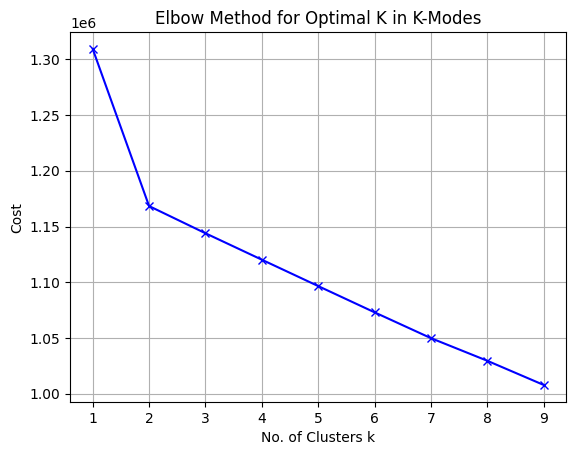

In [15]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Se empieza con el calculo de los clusters: 

In [16]:
n_clusters = 6
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_2 = km.fit_predict(df_Final)
clusters_2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 96397, cost: 1054717.0
Run 1, iteration: 2/100, moves: 3646, cost: 1054717.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 99073, cost: 1059004.0
Run 2, iteration: 2/100, moves: 5205, cost: 1059004.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 68195, cost: 1099087.0
Run 3, iteration: 2/100, moves: 27104, cost: 1098072.0
Run 3, iteration: 3/100, moves: 1306, cost: 1098072.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 66630, cost: 1056678.0
Run 4, iteration: 2/100, moves: 981, cost: 1056678.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 56780, cost: 1079746.0
Run 5, iteration: 2/100, moves: 2565, cost: 1079746.0
I

array([1, 0, 4, ..., 4, 2, 5], dtype=uint16)

In [17]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster2 = df_Final.copy()
df_FCluster2.insert(9,"cluster_labels", clusters_2)
df_FCluster2

sexo  edad          niv_inst        etnia  \
855398   Hombre  88.0          Primaria      Mestizo   
278140   Hombre  86.0          Primaria  Desconocido   
1053057  Hombre  16.0  Educación Básica      Mestizo   
767606   Hombre  75.0       Desconocido      Mestizo   
976670   Hombre  91.0          Primaria      Mestizo   
...         ...   ...               ...          ...   
662915    Mujer  63.0           Ninguno      Mestizo   
1019626  Hombre  69.0           Ninguno      Mestizo   
768105   Hombre  91.0          Superior     Montubio   
1112958  Hombre  75.0          Primaria      Mestizo   
240965    Mujer  76.0          Primaria  Desconocido   

                               prov_res area_res  \
855398                           Carchi   Urbano   
278140                        Pichincha   Urbano   
1053057                          Guayas    Rural   
767606                           Guayas   Urbano   
976670                            Cañar    Rural   
...                                 ...      ...   
662915                           Guayas   Urbano   
1019626  Santo Domingo de los Tsachilas   Urbano   
768105                           Guayas   Urbano   
1112958                     Santa Elena   Urbano   
240965                        Pichincha   Urbano   

                                                    causa4   est_civil  \
855398   E878  Otros trastornos del equilibrio de los e...  Soltero(a)   
278140   I219  Infarto agudo del miocardio, sin otra es...    Viudo(a)   
1053057  W698  Ahogamiento y sumersión mientras se está...  Soltero(a)   
767606   E112  Diabetes mellitus no insulinodependiente...  Soltero(a)   
976670                     J189  Neumonía, no especificada    Viudo(a)   
...                                                    ...         ...   
662915   I120  Enfermedad renal hipertensiva con insufi...  Soltero(a)   
1019626                  A419  Septicemia, no especificada  Soltero(a)   
768105   I219  Infarto agudo del miocardio, sin otra es...   Casado(a)   
1112958  I110  Enfermedad cardíaca hipertensiva con ins...   Casado(a)   
240965                                                I640    Viudo(a)   

                               mor_viol  cluster_labels  
855398                      Desconocido               1  
278140                      Desconocido               0  
1053057  Otros accidentes de transporte               4  
767606                      Desconocido               2  
976670                      Desconocido               0  
...                                 ...             ...  
662915                      Desconocido               3  
1019626                     Desconocido               0  
768105                      Desconocido               4  
1112958                     Desconocido               2  
240965                      Desconocido               5  

[251022 rows x 10 columns]

Este código se utiliza para evaluar la calidad de un clustering utilizando la métrica de Silhouette Score basada en distancias de Gower. Primero, reduce el tamaño del DataFrame df_FCluster2 tomando una muestra aleatoria del 10% de los datos (df_sample). Luego, calcula las distancias de Gower entre las filas de la muestra, excluyendo la columna cluster_labels. Después, utiliza estas distancias para calcular el Silhouette Score promedio, que mide cómo de similar es cada punto a su propio cluster comparado con otros clusters, e imprime este valor.


In [18]:
import gower
from sklearn.metrics import silhouette_score
# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster2.sample(frac=0.1, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 2:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 2: 0.04235419


Este código identifica las columnas categóricas en un DataFrame df. Obtiene los tipos de datos de cada columna, filtra las que son de tipo object (categóricas), y luego imprime sus nombres.

In [19]:
import pandas as pd

# Obtener los tipos de datos de cada columna
tipos_de_datos = df.dtypes

# Filtrar las columnas cuyo tipo de dato es 'object'
columnas_categoricas = tipos_de_datos[tipos_de_datos == 'object'].index.tolist()

print("Columnas categóricas:")
print(columnas_categoricas)


Columnas categóricas:
['prov_insc', 'cant_insc', 'parr_insc', 'anio_insc', 'mes_insc', 'dia_insc', 'fecha_insc', 'nac_fall', 'cod_pais', 'sexo', 'mes_nac', 'dia_nac', 'mes_fall', 'dia_fall', 'fecha_fall', 'cod_edad', 'prov_res', 'cant_res', 'parr_res', 'est_civil', 'sabe_leer', 'etnia', 'lugar_ocur', 'prov_fall', 'cant_fall', 'parr_fall', 'muj_fertil', 'mor_viol', 'lug_viol', 'autopsia', 'niv_inst', 'fecha_nac', 'cer_por', 'area_fall', 'area_res', 'causa3', 'causa', 'causa103', 'causa80', 'causa67A', 'causa67B', 'causa4', 'lc1']


Este código selecciona un subconjunto de columnas específicas del DataFrame df, guardando el resultado en df_selected. Luego, toma una muestra aleatoria del 20% de estas filas seleccionadas y la almacena en df_Final, asegurando la reproducibilidad con random_state=42.

In [21]:
# Seleccionar las columnas especificadas
columns_to_keep = ['parr_insc', 'anio_insc', 'causa3', 'cer_por', 'fecha_nac', 'autopsia', 'muj_fertil','cant_fall','lugar_ocur','lc1']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_Final = df_selected.sample(frac=0.2, random_state=42)

Este código convierte las columnas especificadas del DataFrame df_Final a cadenas de texto. Cada columna mencionada ('parr_insc', 'anio_insc', 'causa3', 'cer_por', 'fecha_nac', 'autopsia', 'muj_fertil', 'cant_fall', 'lugar_ocur', 'lc1') se transforma de su tipo de dato original a tipo str mediante el método astype(str).

In [22]:
# Se convierte las columnas con tipos de datos mixtos a cadenas de texto. 
df_Final['parr_insc'] = df_Final['parr_insc'].astype(str)
df_Final['anio_insc'] = df_Final['anio_insc'].astype(str)
df_Final['causa3'] = df_Final['causa3'].astype(str)
df_Final['cer_por'] = df_Final['cer_por'].astype(str)
df_Final['fecha_nac'] = df_Final['fecha_nac'].astype(str)
df_Final['autopsia'] = df_Final['autopsia'].astype(str)
df_Final['muj_fertil'] = df_Final['muj_fertil'].astype(str)
df_Final['cant_fall'] = df_Final['cant_fall'].astype(str)
df_Final['lugar_ocur'] = df_Final['lugar_ocur'].astype(str)
df_Final['lc1'] = df_Final['lc1'].astype(str)


Este código utiliza el algoritmo KModes para determinar el valor óptimo de K (número de clusters) en un conjunto de datos categóricos. Itera sobre una lista de posibles valores de K (de 1 a 9), ajusta el modelo KModes al DataFrame df_Final para cada valor y calcula el costo del clustering. Los costos se almacenan en la lista cost_red para analizar posteriormente cuál es el número óptimo de clusters.

In [23]:
from kmodes.kmodes import KModes
# Determinamos el valor óptimo de K

cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_Final)
  cost_red.append(kmode_red.cost_)

Se realiza la visualización del gráfico:

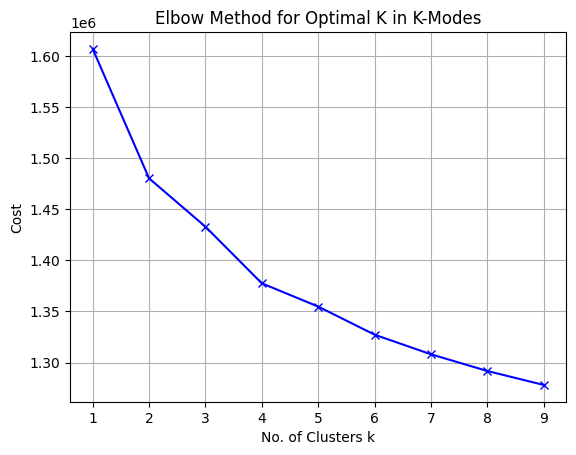

In [24]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Este código crea 6 clusters en df_Final usando KModes. Inicializa KModes con 6 clusters y método 'Huang', ejecuta 10 veces, y muestra detalles (verbose=1). Luego, ajusta el modelo y predice los clusters, guardando las etiquetas en clusters_2.

In [25]:
n_clusters = 6
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_2 = km.fit_predict(df_Final)
clusters_2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 78409, cost: 1325444.0
Run 1, iteration: 2/100, moves: 260, cost: 1325444.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 40702, cost: 1354683.0
Run 2, iteration: 2/100, moves: 4595, cost: 1354683.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 70712, cost: 1321423.0
Run 3, iteration: 2/100, moves: 16037, cost: 1321423.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 78712, cost: 1326532.0
Run 4, iteration: 2/100, moves: 3628, cost: 1326532.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 62176, cost: 1334423.0
Run 5, iteration: 2/100, moves: 1152, cost: 1334423.0
Init: initializing centroids
Init: initializing cluster

array([2, 3, 2, ..., 2, 2, 5], dtype=uint16)

In [26]:
df_Final

parr_insc anio_insc  \
855398                         El Ángel    2016.0   
278140                            Quito    2003.0   
1053057                          Tarqui    2019.0   
767606                           Tarqui    2014.0   
976670                          Azogues    2018.0   
...                                 ...       ...   
662915                        Guayaquil    2012.0   
1019626  Santo Domingo de los Colorados    2018.0   
768105                           Tarqui    2014.0   
1112958         José Luis Tamayo (Muey)    2020.0   
240965                            Quito    2002.0   

                                                    causa3  \
855398   E87   Otros trastornos de los líquidos, de los...   
278140                   I21   Infarto agudo del miocardio   
1053057  W69   Ahogamiento y sumersión mientras se está...   
767606      E11   Diabetes mellitus no insulinodependiente   
976670           J18   Neumonía, organismo no especificado   
...                                                    ...   
662915                 I12   Enfermedad renal hipertensiva   
1019626                            A41   Otras septicemias   
768105                   I21   Infarto agudo del miocardio   
1112958             I11   Enfermedad cardíaca hipertensiva   
240965   I64   Accidente vascular encefálico agudo, no ...   

                        cer_por    fecha_nac         autopsia   muj_fertil  \
855398   Médico (a) no Tratante   1928-06-01  Sin información  Desconocido   
278140      Médico (a) Tratante  Desconocido      Desconocido  Desconocido   
1053057      Médico (a) Legista   2002-12-08               Si  Desconocido   
767606   Médico (a) no Tratante   1938-10-27  Sin información  Desconocido   
976670   Médico (a) no Tratante   1926-11-29               No  Desconocido   
...                         ...          ...              ...          ...   
662915      Médico (a) Tratante  Desconocido  Sin información  Desconocido   
1019626  Médico (a) no Tratante   1949-07-19               No  Desconocido   
768105      Médico (a) Tratante   1922-12-18               No  Desconocido   
1112958  Médico (a) no Tratante   1944-11-21               No  Desconocido   
240965      Médico (a) Tratante  Desconocido      Desconocido  Desconocido   

                               cant_fall  \
855398                              Mira   
278140   Distrito Metropolitano de Quito   
1053057                        Guayaquil   
767606                         Guayaquil   
976670                           Azogues   
...                                  ...   
662915                         Guayaquil   
1019626                    Santo Domingo   
768105                         Guayaquil   
1112958                          Salinas   
240965   Distrito Metropolitano de Quito   

                                      lugar_ocur  \
855398                                      Casa   
278140                                      Casa   
1053057                                     Otro   
767606                                      Casa   
976670                                      Casa   
...                                          ...   
662915                                      Casa   
1019626  Establecimiento del Ministerio de Salud   
768105                                      Casa   
1112958                                     Casa   
240965                 Establecimientos del IESS   

                                                       lc1  
855398   28 Trastornos de los líquidos, electrolitos, y...  
278140              35 Enfermedades isquémicas del corazón  
1053057            60 Ahogamiento y sumersión accidentales  
767606                                26 Diabetes Mellitus  
976670                             46 Influenza y neumonía  
...                                                    ...  
662915                       34 Enfermedades hipertensivas  
1019626                                       6 Septicemia  
768105  

# Prueba 1

In [27]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster2 = df_Final.copy()
df_FCluster2.insert(9,"cluster_labels", clusters_2)


In [28]:
df_Final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251022 entries, 855398 to 240965
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   parr_insc   251022 non-null  object
 1   anio_insc   251022 non-null  object
 2   causa3      251022 non-null  object
 3   cer_por     251022 non-null  object
 4   fecha_nac   251022 non-null  object
 5   autopsia    251022 non-null  object
 6   muj_fertil  251022 non-null  object
 7   cant_fall   251022 non-null  object
 8   lugar_ocur  251022 non-null  object
 9   lc1         251022 non-null  object
dtypes: object(10)
memory usage: 21.1+ MB


Este código evalúa la calidad de un clustering en df_FCluster2. Reduce el tamaño del conjunto de datos tomando una muestra aleatoria del 10%. Calcula las distancias de Gower entre las filas de la muestra, excluyendo la columna 'cluster_labels'. Luego, calcula el Silhouette Score promedio para estos datos y lo imprime.


In [29]:
import gower
from sklearn.metrics import silhouette_score

# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster2.sample(frac=0.1, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 6:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 6: 0.014300959


In [30]:
df

prov_insc                        cant_insc   parr_insc anio_insc  \
0           El Oro                          Machala     Machala    1997.0   
1           El Oro                        Arenillas   Arenillas    1997.0   
2           El Oro                         El Guabo    El Guabo    1997.0   
3           El Oro                         El Guabo    El Guabo    1997.0   
4           El Oro                           Pasaje      Pasaje    1997.0   
...            ...                              ...         ...       ...   
1255105     Guayas                        Guayaquil  Rocafuerte    2021.0   
1255106  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   
1255107  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   
1255108  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   
1255109  Pichincha  Distrito Metropolitano de Quito    Iñaquito    2021.0   

           mes_insc     dia_insc   fecha_insc         nac_fall  \
0              Mayo  Desconocido  Desconocido      Desconocido   
1         Noviembre  Desconocido  Desconocido      Desconocido   
2             Marzo  Desconocido  Desconocido      Desconocido   
3         Diciembre  Desconocido  Desconocido      Desconocido   
4         Noviembre  Desconocido  Desconocido      Desconocido   
...             ...          ...          ...              ...   
1255105     Octubre         20.0   2021-10-20  Sin información   
1255106       Abril          6.0   2021-04-06       Extranjero   
1255107        Mayo         18.0   2021-05-18  Sin información   
1255108        Mayo         14.0   2021-05-14  Sin información   
1255109  Septiembre         29.0   2021-09-29  Sin información   

                      cod_pais    sexo  ...  area_fall area_res  \
0                          NaN  Hombre  ...     Urbana   Urbano   
1                          NaN  Hombre  ...     Urbana   Urbano   
2                          NaN   Mujer  ...     Urbana   Urbano   
3                          NaN  Hombre  ...     Urbana   Urbano   
4                          NaN  Hombre  ...     Urbana   Urbano   
...                        ...     ...  ...        ...      ...   
1255105  Zonas sin especificar  Hombre  ...     Urbana   Urbano   
1255106  Zonas sin especificar  Hombre  ...     Urbana   Urbano   
1255107  Zonas sin especificar  Hombre  ...      Rural   Urbano   
1255108  Zonas sin especificar  Hombre  ...     Urbana   Urbano   
1255109  Zonas sin especificar   Mujer  ...      Rural   Urbano   

                                                    causa3  \
0                         C16   Tumor maligno del estómago   
1        X74   Lesión autoinfligida intencionalmente po...   
2        G03   Meningitis debida a otras causas y a las...   
3        A16   Tuberculosis respiratoria, no confirmada...   
4        W69   Ahogamiento y sumersión mientras se está...   
...                                                    ...   
1255105  Y34   Evento no especificado, de intención no ...   
1255106  Y34   Evento no especificado, de intención no ...   
1255107  Y34   Evento no especificado, de intención no ...   
1255108  Y34   Evento no especificado, de intención no ...   
1255109  Y34   Evento no especificado, de intención no ...   

                                                     causa  \
0                         C16   Tumor maligno del estómago   
1        X74   Lesión autoinfligida intencionalmente po...   
2        G03   Meningitis debida a otras causas y a las...   
3        A16   Tuberculosis respiratoria, no confirmada...   
4        W69   Ahogamiento y sumersión mientras se está...   
...                                                    ...   
1255105  Y34   Evento no especificado, de intención no ...   
1255106  Y34   Evento no especificado, de intención no ...   
1255107  Y34   Evento no especificado, de intención no ...   
1255108  Y34   Evento no especificado, de intención no ...   
1255109  Y34   Evento no especificado, de intención no ... 

Preparación del para el clustering, en esta parte se convierte la columna 'anio_fall' a tipo cadena (str) para tratar los años como categorías. Luego, identifica todas las columnas de tipo float en el DataFrame y las convierte también a cadenas. Estas conversiones facilitan el procesamiento de datos categóricos, previenen errores con tipos de datos mixtos y preparan el DataFrame para algoritmos como KModes, que requieren datos categóricos.

In [31]:
df['anio_fall'] = df['anio_fall'].astype(str)

float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype(str)

In [32]:
# Seleccionar las columnas especificadas
columns_to_keep = ['prov_fall', 'sexo', 'area_fall', 'lc1','anio_fall']
df_selected = df[columns_to_keep]
# Convertir la columna 'anio_fall' a tipo cadena de texto (string)
df['anio_fall'] = df['anio_fall'].astype(str)

# Obtener el 20% de los datos aleatorios
df_prueba1 = df_selected.sample(frac=0.2, random_state=40);

In [33]:
df_prueba1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251022 entries, 935151 to 215231
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   prov_fall  251022 non-null  object
 1   sexo       251022 non-null  object
 2   area_fall  251022 non-null  object
 3   lc1        251022 non-null  object
 4   anio_fall  251022 non-null  object
dtypes: object(5)
memory usage: 11.5+ MB


Se convierte varias columnas del DataFrame a tipo string, se transforman de su tipo original a cadenas de texto, unificando así los tipos de datos para facilitar el procesamiento categórico y asegurar consistencia en el análisis posterior.

In [34]:
df_prueba1['prov_fall'] = df_prueba1['prov_fall'].astype(str)
df_prueba1['sexo'] = df_prueba1['sexo'].astype(str)
df_prueba1['area_fall'] = df_prueba1['area_fall'].astype(str)
df_prueba1['lc1'] = df_prueba1['lc1'].astype(str)
df_prueba1['anio_fall'] = df_prueba1['anio_fall'].astype(str)

Se utiliza el algoritmo KModes para determinar el valor óptimo de K (número de clusters) en el DataFrame. Itera sobre una lista de posibles valores de K (de 1 a 9), ajusta el modelo KModes a los datos para cada valor, y calcula el costo del clustering. Los costos resultantes se almacenan en la lista cost_red para analizar y seleccionar el número óptimo de clusters.

In [35]:
from kmodes.kmodes import KModes
# Determinamos el valor óptimo de K

cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba1)
  cost_red.append(kmode_red.cost_)

Se realiza el gráfico de Codo

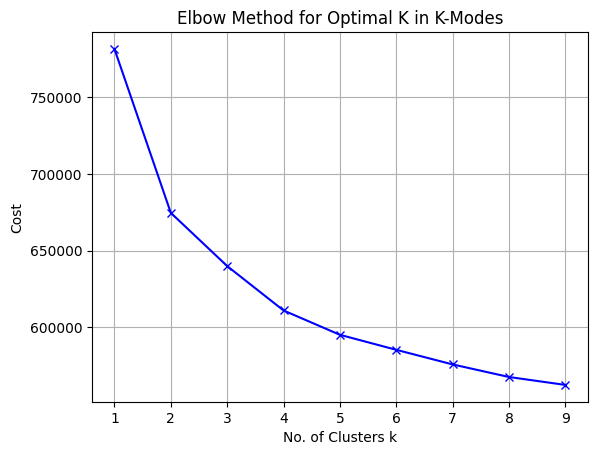

In [36]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

En base al gráfico del codo se aplica el algoritmo KModes para crear 4 clusters en el DataFrame. Utilizando el método de inicialización 'Huang', ejecuta el clustering 10 veces para seleccionar la mejor solución. 

In [37]:
n_clusters = 4
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_4 = km.fit_predict(df_prueba1)
clusters_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 37448, cost: 627233.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 82502, cost: 624391.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 14179, cost: 659017.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 18019, cost: 640762.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 15081, cost: 626042.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 65228, cost: 666556.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 23917, cost: 633379.0
Init: initializing centroids
Init: initializing clusters
Start

array([0, 3, 2, ..., 1, 0, 0], dtype=uint16)

Este código copia el DataFrame df_prueba1 a df_FCluster4 y añade una columna con las etiquetas de cluster en la sexta posición, integrando así la información de clusters en el DataFrame original.

In [38]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster4 = df_prueba1.copy()
df_FCluster4.insert(5,"cluster_labels", clusters_4)


In [39]:
df_FCluster4 #Se muestra el dataframe. 

prov_fall    sexo area_fall  \
935151         Azuay  Hombre    Urbana   
175592        Guayas   Mujer    Urbana   
861969     Pichincha   Mujer    Urbana   
811518   Santa Elena   Mujer    Urbana   
1062163     Los Ríos   Mujer    Urbana   
...              ...     ...       ...   
1203391        Azuay   Mujer     Rural   
164562        Guayas  Hombre    Urbana   
1082784   Tungurahua   Mujer     Rural   
1051014       Guayas  Hombre    Urbana   
215231        Guayas  Hombre    Urbana   

                                                       lc1 anio_fall  \
935151   47 Enfermedades crónicas de las vías respirato...    2017.0   
175592                    9 Neoplasia maligna del estómago    2001.0   
861969   25 Neoplasias benignas in situ y de comportami...    2016.0   
811518                                26 Diabetes Mellitus    2015.0   
1062163              57 Accidentes de transporte terrestre    2019.0   
...                                                    ...       ...   
1203391  41 Insuficiencia cardíaca, complicaciones y en...    2021.0   
164562         51 Cirrosis y otras enfermedades del hígado    2001.0   
1082784  56 Malformaciones congénitas, deformidades y a...    2019.0   
1051014              57 Accidentes de transporte terrestre    2019.0   
215231                                    39 Paro cardíaco    2002.0   

         cluster_labels  
935151                0  
175592                3  
861969                2  
811518                3  
1062163               3  
...                 ...  
1203391               3  
164562                0  
1082784               1  
1051014               0  
215231                0  

[251022 rows x 6 columns]

Se evalúa la calidad del clustering en df_FCluster4, en donde se calcula las distancias de Gower entre las filas de muestra, excluyendo la columna de etiqueta de cluster. Finalmente, se utiliza estas etiquetas para calcular el silhouette score promedio. 

In [40]:
import gower
from sklearn.metrics import silhouette_score
# Reduce el tamaño del conjunto de datos tomando una muestra aleatoria más pequeña
df_sample = df_FCluster4.sample(frac=0.2, random_state=42)

# Calcula las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcula el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 2:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 2: 0.13065203


Se realiza el calculo reduciendo el tamaño de los clusters a 3. 

In [41]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba1)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18530, cost: 665622.0
Run 1, iteration: 2/100, moves: 4058, cost: 665622.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 120660, cost: 654608.0
Run 2, iteration: 2/100, moves: 6644, cost: 654608.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7926, cost: 653950.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 17987, cost: 698556.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 22094, cost: 660673.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 37831, cost: 647916.0
Run 6, iteration: 2/100, moves: 4847, cost: 647916.0
Init: initializing centroids
Init: in

array([0, 1, 1, ..., 0, 0, 0], dtype=uint16)

Este código copia el DataFrame df_prueba1 a df_FCluster3 y añade una columna con las etiquetas de cluster en la sexta posición, integrando así la información de clusters en el DataFrame original.

In [42]:
df_FCluster3 = df_prueba1.copy()
df_FCluster3.insert(5,"cluster_labels", clusters_3)

Se evalúa la calidad del clustering, en donde se calcula las distancias de Gower entre las filas de muestra, excluyendo la columna de etiqueta de cluster. Finalmente, se utiliza estas etiquetas para calcular el silhouette score promedio. 

In [43]:
import gower
from sklearn.metrics import silhouette_score
# Reduce el tamaño del conjunto de datos tomando una muestra aleatoria más pequeña
df_sample = df_FCluster3.sample(frac=0.2, random_state=42)

# Calcula las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcula el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 3: 0.19620946


# Prueba 2

A continuación se selecciona un subconjunto de columnas específicas ('prov_fall', 'sexo', 'area_fall', 'lc1', 'anio_fall', 'nac_fall') del DataFrame df y guarda el resultado en df_selected. Luego, convierte la columna 'anio_fall' a tipo cadena (str) en el DataFrame original. 

In [44]:
# Seleccionar las columnas especificadas
columns_to_keep = ['prov_fall', 'sexo', 'area_fall', 'lc1','anio_fall','nac_fall']
df_selected = df[columns_to_keep]
# Convertir la columna 'anio_fall' a tipo cadena de texto (string)
df['anio_fall'] = df['anio_fall'].astype(str)

# Obtener el 20% de los datos aleatorios
df_prueba2 = df_selected.sample(frac=0.2, random_state=40);

Se convierte varias columnas del DataFrame df_prueba2 a tipo cadena (str). Las columnas 'prov_fall', 'sexo', 'area_fall', 'lc1' y 'anio_fall' se transforman de su tipo original a cadenas de texto, unificando así los tipos de datos para facilitar el procesamiento categórico y asegurar consistencia en el análisis posterior.

In [45]:
# Convertir las columnas con tipos de datos mixtos a cadenas de texto (string)
df_prueba2['prov_fall'] = df_prueba2['prov_fall'].astype(str)
df_prueba2['sexo'] = df_prueba2['sexo'].astype(str)
df_prueba2['area_fall'] = df_prueba2['area_fall'].astype(str)
df_prueba2['lc1'] = df_prueba2['lc1'].astype(str)
df_prueba2['anio_fall'] = df_prueba2['anio_fall'].astype(str)


Se utiliza el algoritmo KModes para determinar el valor óptimo de K (número de clusters) en el DataFrame. Itera sobre una lista de posibles valores de K (de 1 a 9), ajusta el modelo KModes a los datos para cada valor, y calcula el costo del clustering.

In [46]:
from kmodes.kmodes import KModes
# Determinamos el valor óptimo de K

cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba2)
  cost_red.append(kmode_red.cost_)

Se realiza el gráfico del codo

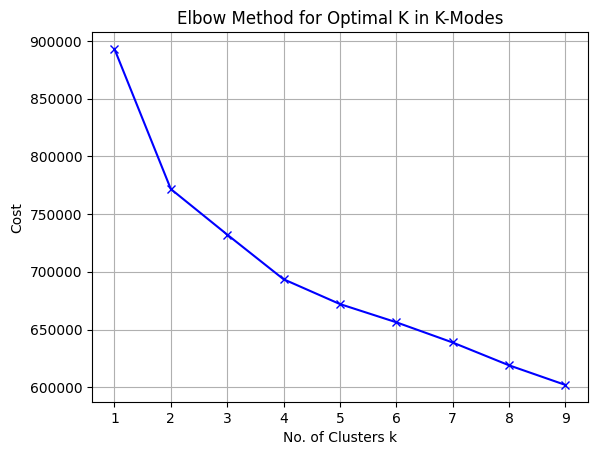

In [47]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Se aplica el algoritmo KModes para crear 4 clusters en el DataFrame, utilizando el método de inicialización 'Huang', ejecuta el clustering 10 veces para seleccionar la mejor solución. Luego, ajusta el modelo a los datos y predice los clusters, guardando las etiquetas de cluster resultantes

In [48]:
n_clusters = 4
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_4 = km.fit_predict(df_prueba2)
clusters_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15451, cost: 740186.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16009, cost: 733533.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 55256, cost: 676345.0
Run 3, iteration: 2/100, moves: 726, cost: 676345.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 23740, cost: 805948.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 33716, cost: 694838.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 19604, cost: 690838.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 10135, cost: 840121.0
Init: init

array([3, 0, 2, ..., 2, 1, 1], dtype=uint16)

Se copia el DataFrame df_prueba1 a df_FCluster4 y añade una columna con las etiquetas de cluster en la sexta posición, integrando así la información de clusters en el DataFrame original.

In [49]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster4 = df_prueba1.copy()
df_FCluster4.insert(5,"cluster_labels", clusters_4)

Se evalúa la calidad del clustering, en donde se calcula las distancias de Gower entre las filas de muestra, excluyendo la columna de etiqueta de cluster. Finalmente, se utiliza estas etiquetas para calcular el silhouette score promedio. 

In [50]:
import gower
from sklearn.metrics import silhouette_score
# Reduce el tamaño del conjunto de datos tomando una muestra aleatoria más pequeña
df_sample = df_FCluster4.sample(frac=0.2, random_state=42)

# Calcula las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcula el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 4:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 4: 0.030047057


Se aplica el algoritmo KModes para crear 5 clusters en el DataFrame. Inicializa KModes con 5 clusters, utilizando el método de inicialización 'Huang', ejecuta el clustering 20 veces para seleccionar la mejor solución. Luego, ajusta el modelo a los datos y predice los clusters, guardando las etiquetas de cluster resultantes.

In [51]:
n_clusters = 5
km = KModes(n_clusters=n_clusters, init='Huang', n_init=20, verbose=1)
clusters_5 = km.fit_predict(df_prueba2)
clusters_5

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 73659, cost: 704763.0
Run 1, iteration: 2/100, moves: 9100, cost: 704763.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 32967, cost: 650663.0
Run 2, iteration: 2/100, moves: 2841, cost: 650663.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 13633, cost: 746158.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 22793, cost: 646873.0
Run 4, iteration: 2/100, moves: 8261, cost: 646873.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 102285, cost: 698201.0
Run 5, iteration: 2/100, moves: 19815, cost: 698201.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 2681

array([3, 1, 2, ..., 2, 0, 0], dtype=uint16)

In [52]:

# Insertemos las etiquetas en nuestro dataset original.
df_FCluster5 = df_prueba2.copy()
df_FCluster5.insert(6,"cluster_labels", clusters_5)
df_FCluster5

prov_fall    sexo area_fall  \
935151         Azuay  Hombre    Urbana   
175592        Guayas   Mujer    Urbana   
861969     Pichincha   Mujer    Urbana   
811518   Santa Elena   Mujer    Urbana   
1062163     Los Ríos   Mujer    Urbana   
...              ...     ...       ...   
1203391        Azuay   Mujer     Rural   
164562        Guayas  Hombre    Urbana   
1082784   Tungurahua   Mujer     Rural   
1051014       Guayas  Hombre    Urbana   
215231        Guayas  Hombre    Urbana   

                                                       lc1 anio_fall  \
935151   47 Enfermedades crónicas de las vías respirato...    2017.0   
175592                    9 Neoplasia maligna del estómago    2001.0   
861969   25 Neoplasias benignas in situ y de comportami...    2016.0   
811518                                26 Diabetes Mellitus    2015.0   
1062163              57 Accidentes de transporte terrestre    2019.0   
...                                                    ...       ...   
1203391  41 Insuficiencia cardíaca, complicaciones y en...    2021.0   
164562         51 Cirrosis y otras enfermedades del hígado    2001.0   
1082784  56 Malformaciones congénitas, deformidades y a...    2019.0   
1051014              57 Accidentes de transporte terrestre    2019.0   
215231                                    39 Paro cardíaco    2002.0   

            nac_fall  cluster_labels  
935151   Ecuatoriana               3  
175592   Desconocido               1  
861969   Ecuatoriana               2  
811518   Ecuatoriana               2  
1062163  Ecuatoriana               2  
...              ...             ...  
1203391  Ecuatoriana               2  
164562   Desconocido               0  
1082784  Ecuatoriana               2  
1051014  Ecuatoriana               0  
215231   Desconocido               0  

[251022 rows x 7 columns]

Se evalúa la calidad del clustering, en donde se calcula las distancias de Gower entre las filas de muestra, excluyendo la columna de etiqueta de cluster. Finalmente, se utiliza estas etiquetas para calcular el silhouette score promedio. 

In [53]:
import gower
from sklearn.metrics import silhouette_score
# Reduce el tamaño del conjunto de datos tomando una muestra aleatoria más pequeña
df_sample = df_FCluster5.sample(frac=0.2, random_state=42)

# Calcula las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcula el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 5:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 5: 0.10462268


# Modelo Final 1

Se selecciona un subconjunto de columnas específicas ('sexo', 'area_fall', 'lc1') del DataFrame df y guarda el resultado en df_selected. Luego, toma una muestra aleatoria del 20% de las filas de df_selected y la almacena en df_prueba3, asegurando la reproducibilidad con random_state=40.

In [54]:
# Seleccionar las columnas especificadas
columns_to_keep = ['sexo', 'area_fall', 'lc1']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba3 = df_selected.sample(frac=0.2, random_state=40);

Se convierte varias columnas del DataFrame df_prueba3 a tipo cadena (str). Las columnas 'sexo', 'area_fall' y 'lc1' se transforman de su tipo original a cadenas de texto para unificar los tipos de datos y facilitar el procesamiento categórico. Luego, ajusta el modelo KModes a df_prueba3 para realizar el clustering en estos datos.

In [55]:
# Convertir las columnas con tipos de datos mixtos a cadenas de texto (string)
df_prueba3['sexo'] = df_prueba3['sexo'].astype(str)
df_prueba3['area_fall'] = df_prueba3['area_fall'].astype(str)
df_prueba3['lc1'] = df_prueba3['lc1'].astype(str)

# Ajustar el modelo KModes
kmode_red.fit_predict(df_prueba3)


array([0, 1, 1, ..., 1, 7, 0], dtype=uint16)

Utiliza el algoritmo KModes para determinar el valor óptimo de K (número de clusters) en el DataFrame df_prueba3. Itera sobre una lista de posibles valores de K (de 1 a 9), ajusta el modelo KModes a los datos para cada valor, y calcula el costo del clustering. Los costos resultantes se almacenan en la lista cost_red para analizar y seleccionar el número óptimo de clusters.

In [56]:
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba3)
  cost_red.append(kmode_red.cost_)

Se realiza la visualizaciíon de los costos del clustering para diferentes valores de K, utilizando el gráfico del codo. 

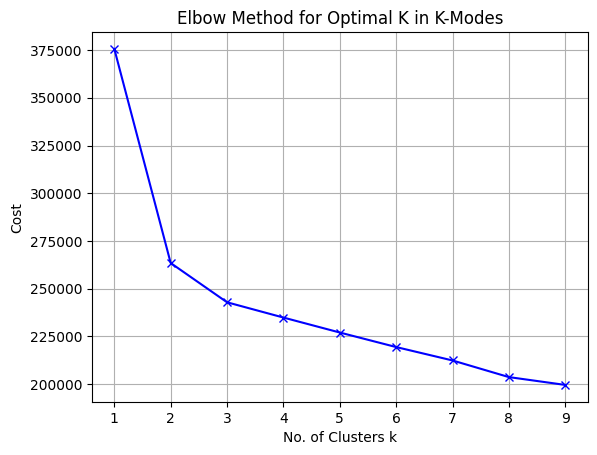

In [57]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Se aplica el algoritmo KModes para crear 3 clusters en el DataFrame df_prueba3. Inicializa KModes con 3 clusters, utilizando el método de inicialización 'Huang', ejecuta el clustering 10 veces para seleccionar la mejor solución. Luego, ajusta el modelo a los datos y predice los clusters, guardando las etiquetas de cluster resultantes en clusters_3.

In [58]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba3)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 263306.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 14400, cost: 242908.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 266051.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 10834, cost: 257403.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9240, cost: 262466.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 10396, cost: 241936.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 345550.0
Init: initializing centroids
Init: initializing clusters
Starting iteration

array([2, 1, 1, ..., 0, 2, 2], dtype=uint16)

Se copia el DataFrame df_prueba3 a df_FCluster3 y añade una columna con las etiquetas de cluster en la cuarta posición, integrando así la información de clusters en el DataFrame original.

In [59]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster3 = df_prueba3.copy()
df_FCluster3.insert(3,"cluster_labels", clusters_3)


In [60]:
df_FCluster3 # Se muestra el dataframe

sexo area_fall                                                lc1  \
935151   Hombre    Urbana  47 Enfermedades crónicas de las vías respirato...   
175592    Mujer    Urbana                   9 Neoplasia maligna del estómago   
861969    Mujer    Urbana  25 Neoplasias benignas in situ y de comportami...   
811518    Mujer    Urbana                               26 Diabetes Mellitus   
1062163   Mujer    Urbana              57 Accidentes de transporte terrestre   
...         ...       ...                                                ...   
1203391   Mujer     Rural  41 Insuficiencia cardíaca, complicaciones y en...   
164562   Hombre    Urbana        51 Cirrosis y otras enfermedades del hígado   
1082784   Mujer     Rural  56 Malformaciones congénitas, deformidades y a...   
1051014  Hombre    Urbana              57 Accidentes de transporte terrestre   
215231   Hombre    Urbana                                   39 Paro cardíaco   

         cluster_labels  
935151                2  
175592                1  
861969                1  
811518                1  
1062163               1  
...                 ...  
1203391               0  
164562                2  
1082784               0  
1051014               2  
215231                2  

[251022 rows x 4 columns]

Se evalúa la calidad del clustering en df_FCluster3. Primero, reduce el tamaño del conjunto de datos tomando una muestra aleatoria del 20%. Luego, calcula las distancias de Gower entre las filas de la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, utiliza estas distancias para calcular el Silhouette Score promedio, que mide cómo de bien están agrupados los puntos dentro de sus clusters. El resultado se imprime para analizar la calidad del clustering con K = 3.

In [61]:
import gower
from sklearn.metrics import silhouette_score
# Reduce el tamaño del conjunto de datos tomando una muestra aleatoria más pequeña
df_sample = df_FCluster3.sample(frac=0.2, random_state=42)

# Calcula las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcula el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 3: 0.4264558


In [62]:
df_prueba3 #Se visualiza el DataFrame

sexo area_fall                                                lc1
935151   Hombre    Urbana  47 Enfermedades crónicas de las vías respirato...
175592    Mujer    Urbana                   9 Neoplasia maligna del estómago
861969    Mujer    Urbana  25 Neoplasias benignas in situ y de comportami...
811518    Mujer    Urbana                               26 Diabetes Mellitus
1062163   Mujer    Urbana              57 Accidentes de transporte terrestre
...         ...       ...                                                ...
1203391   Mujer     Rural  41 Insuficiencia cardíaca, complicaciones y en...
164562   Hombre    Urbana        51 Cirrosis y otras enfermedades del hígado
1082784   Mujer     Rural  56 Malformaciones congénitas, deformidades y a...
1051014  Hombre    Urbana              57 Accidentes de transporte terrestre
215231   Hombre    Urbana                                   39 Paro cardíaco

[251022 rows x 3 columns]

Se convierte las variables categóricas del DataFrame df_prueba3 en variables dummy/indicadoras usando la función pd.get_dummies() de pandas. Esto transforma cada categoría en una columna binaria (0 o 1), facilitando así el análisis y procesamiento de datos categóricos.

In [63]:
# Convertir variables categóricas a variables dummy/indicadoras
df_categorical = pd.get_dummies(df_prueba3)
df_categorical

sexo_Hombre  sexo_Mujer  area_fall_Rural  area_fall_Urbana  \
935151          True       False            False              True   
175592         False        True            False              True   
861969         False        True            False              True   
811518         False        True            False              True   
1062163        False        True            False              True   
...              ...         ...              ...               ...   
1203391        False        True             True             False   
164562          True       False            False              True   
1082784        False        True             True             False   
1051014         True       False            False              True   
215231          True       False            False              True   

         lc1_1 Enfermedades infecciosas intestinales  \
935151                                         False   
175592                                         False   
861969                                         False   
811518                                         False   
1062163                                        False   
...                                              ...   
1203391                                        False   
164562                                         False   
1082784                                        False   
1051014                                        False   
215231                                         False   

         lc1_10 Neoplasia maligna del colon, sigmoide, recto y ano  lc1_100.0  \
935151                                               False              False   
175592                                               False              False   
861969                                               False              False   
811518                                               False              False   
1062163                                              False              False   
...                                                    ...                ...   
1203391                                              False              False   
164562                                               False              False   
1082784                                              False              False   
1051014                                              False              False   
215231                                               False              False   

         lc1_101.0  \
935151       False   
175592       False   
861969       False   
811518       False   
1062163      False   
...            ...   
1203391      False   
164562       False   
1082784      False   
1051014      False   
215231       False   

         lc1_11 Neoplasia maligna del hígado y de las vías biliares  \
935151                                               False            
175592                                               False            
861969                                               False            
811518                                               False            
1062163                                              False            
...                                                    ...            
1203391                                              False            
164562                                               False            
1082784                                              False            
1051014                                              False            
215231                                               False            

         lc1_12 Neoplasia maligna de la vesícula biliar y de otras  ...  \
935151                                               False          ...   
175592                                               False          ...   
861969                                               False          ...   
811518                                               False          ...   
1062163          

Se aplica el Análisis de Correspondencias Múltiples (MCA) al DataFrame df_categorical. Configura MCA para obtener 5 componentes, ajusta el modelo a los datos y transforma el conjunto de datos para obtener las coordenadas de cada muestra en los nuevos ejes. Las coordenadas resultantes se almacenan en mca_coordinates, lo que facilita la reducción de dimensionalidad y la visualización de datos categóricos en un espacio de menor dimensión.

In [64]:
# Indicamos el número de componentes que requerimos
import prince
mca = prince.MCA(n_components=5)
# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categorical)
mca
# Transforme el conjunto de datos (esto le dará las coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categorical)
mca_coordinates

0         1         2         3         4
935151   0.130941 -0.074443 -0.028261 -0.008987  0.045047
175592  -0.177193  0.006216 -0.094294 -0.003857  0.122841
861969  -0.205832 -0.029557 -0.017130 -0.062281 -0.122095
811518  -0.221972 -0.042581 -0.176739  0.141740  0.027566
1062163 -0.110784 -0.017089  0.093222  0.040827 -0.023058
...           ...       ...       ...       ...       ...
1203391 -0.093320  0.469408  0.055396  0.290891  0.010943
164562   0.140623 -0.117586 -0.095060  0.056765 -0.041434
1082784 -0.095587  0.404223  0.084144 -0.057167  0.131110
1051014  0.198541 -0.092649  0.090174  0.041886 -0.025447
215231   0.117852 -0.059429  0.089523  0.104420  0.111530

[251022 rows x 5 columns]

Se añade una columna con las etiquetas de los clusters al DataFrame mca_coordinates. Utiliza las etiquetas de clusters de df_FCluster3 y las asigna a una nueva columna llamada 'cluster_labels' en mca_coordinates. Esto integra la información de los clusters en el conjunto de datos transformado por MCA, permitiendo un análisis más detallado de los clusters en el espacio reducido.

In [65]:
# Agregamos una columna con la etiqueta de los clusters. K = 2
mca_coordinates['cluster_labels'] = df_FCluster3['cluster_labels']
mca_coordinates

0         1         2         3         4  cluster_labels
935151   0.130941 -0.074443 -0.028261 -0.008987  0.045047               2
175592  -0.177193  0.006216 -0.094294 -0.003857  0.122841               1
861969  -0.205832 -0.029557 -0.017130 -0.062281 -0.122095               1
811518  -0.221972 -0.042581 -0.176739  0.141740  0.027566               1
1062163 -0.110784 -0.017089  0.093222  0.040827 -0.023058               1
...           ...       ...       ...       ...       ...             ...
1203391 -0.093320  0.469408  0.055396  0.290891  0.010943               0
164562   0.140623 -0.117586 -0.095060  0.056765 -0.041434               2
1082784 -0.095587  0.404223  0.084144 -0.057167  0.131110               0
1051014  0.198541 -0.092649  0.090174  0.041886 -0.025447               2
215231   0.117852 -0.059429  0.089523  0.104420  0.111530               2

[251022 rows x 6 columns]

Realización de gráficos para el respectivo análisis. 

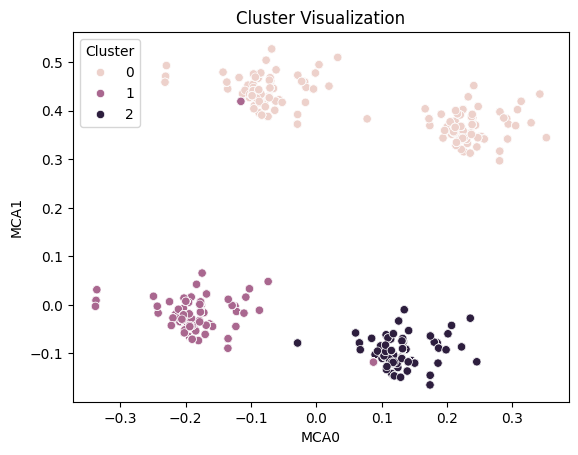

In [66]:
# Dibujamos los clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.

sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

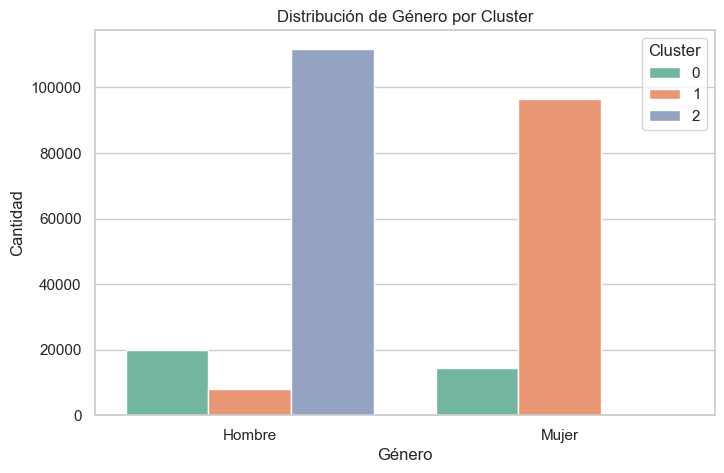

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='sexo', hue='cluster_labels', data=df_FCluster3, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()


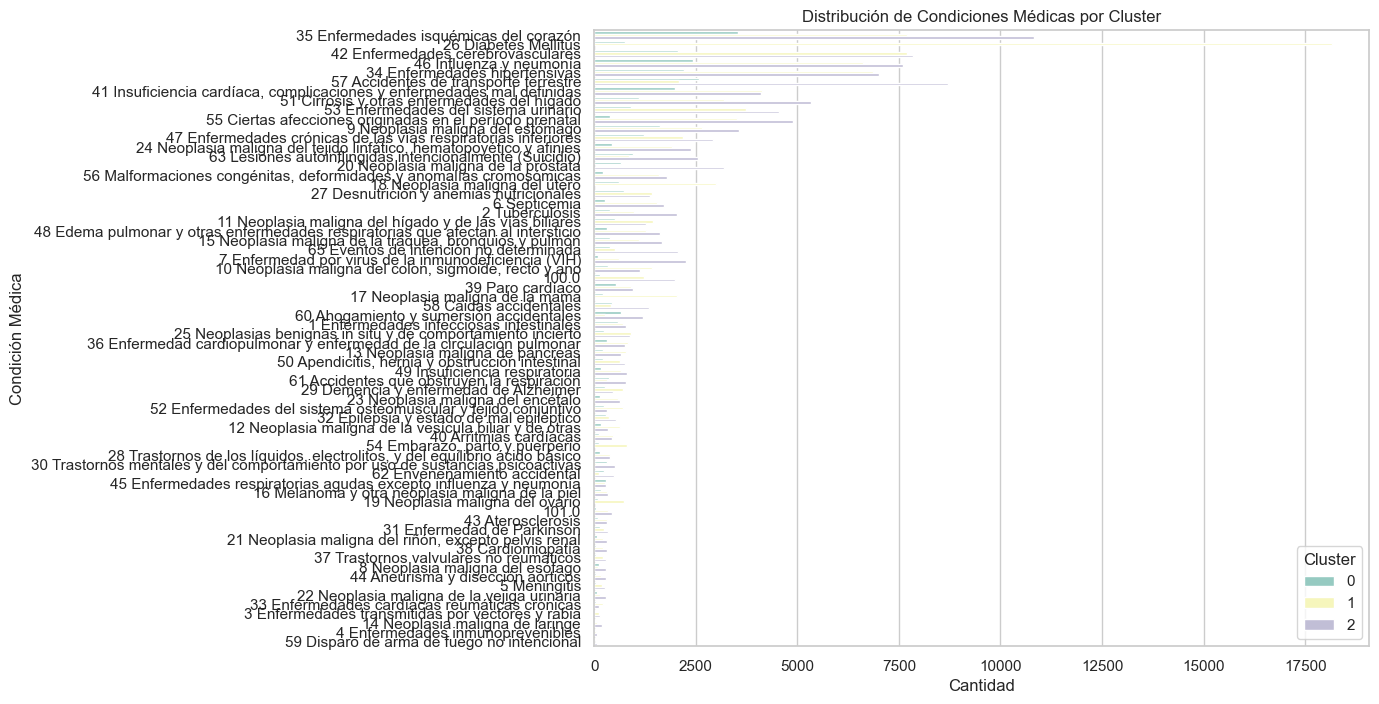

In [68]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='lc1', hue='cluster_labels', data=df_FCluster3, palette='Set3', order=df['lc1'].value_counts().index)

plt.title('Distribución de Condiciones Médicas por Cluster')
plt.xlabel('Cantidad')
plt.ylabel('Condición Médica')
plt.legend(title='Cluster')

plt.show()


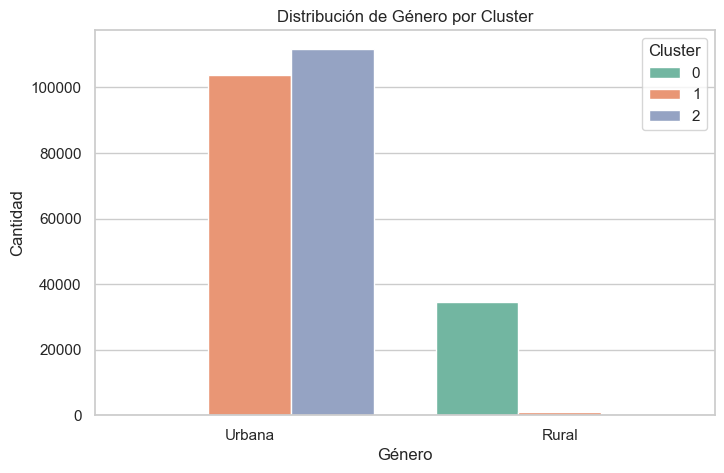

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='area_fall', hue='cluster_labels', data=df_FCluster3, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

Se aplica el algoritmo KModes para crear 4 clusters en el DataFrame df_prueba3. Inicializa KModes con 4 clusters, utilizando el método de inicialización 'Huang', y ejecuta el clustering 20 veces para seleccionar la mejor solución (n_init=20). Habilita la salida detallada (verbose=1) para mostrar el proceso. Luego, ajusta el modelo a los datos y predice los clusters, guardando las etiquetas de cluster resultantes en clusters_4.

In [70]:
n_clusters = 4
km = KModes(n_clusters=n_clusters, init='Huang', n_init=20, verbose=1)
clusters_4 = km.fit_predict(df_prueba3)
clusters_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 250875.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 101630, cost: 243838.0
Run 2, iteration: 2/100, moves: 0, cost: 243838.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 338476.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 17360, cost: 235068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 100594, cost: 249639.0
Run 5, iteration: 2/100, moves: 0, cost: 249639.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 360942.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, m

array([0, 1, 1, ..., 1, 0, 0], dtype=uint16)

Se copia el DataFrame df_prueba3 a df_FCluster4 y añade una columna con las etiquetas de cluster en la cuarta posición, integrando así la información de clusters en el DataFrame original. Las etiquetas de cluster provienen del modelo KModes ajustado anteriormente y se almacenan en la columna 'cluster_labels' de df_FCluster4.

In [71]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster4 = df_prueba3.copy()
df_FCluster4.insert(3,"cluster_labels", clusters_4)


Se muestra las cinco primeras lineas del Dataframe 'df_cluster4'

In [72]:
df_FCluster4.head()

sexo area_fall                                                lc1  \
935151   Hombre    Urbana  47 Enfermedades crónicas de las vías respirato...   
175592    Mujer    Urbana                   9 Neoplasia maligna del estómago   
861969    Mujer    Urbana  25 Neoplasias benignas in situ y de comportami...   
811518    Mujer    Urbana                               26 Diabetes Mellitus   
1062163   Mujer    Urbana              57 Accidentes de transporte terrestre   

         cluster_labels  
935151                0  
175592                1  
861969                1  
811518                3  
1062163               1

Se evalúa la calidad del clustering en df_FCluster4 con el Silhouette Score utilizando distancias de Gower. Primero, toma una muestra aleatoria del 20% del DataFrame para reducir su tamaño. Luego, calcula las distancias de Gower entre las filas de la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio, que mide cómo de bien están agrupados los puntos dentro de sus clusters, con K = 4.

In [73]:
import gower
from sklearn.metrics import silhouette_score
# Reduce el tamaño del conjunto de datos tomando una muestra aleatoria más pequeña
df_sample = df_FCluster4.sample(frac=0.2, random_state=42)

# Calcula las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcula el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 4:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 4: 0.2626497


Se convierte las variables categóricas del DataFrame df_prueba3 en variables dummy/indicadoras usando la función pd.get_dummies() de pandas. Esto transforma cada categoría en una columna binaria (0 o 1), facilitando así el análisis y procesamiento de datos categóricos.

In [74]:
df_categorical2 = pd.get_dummies(df_prueba3)
df_categorical2

sexo_Hombre  sexo_Mujer  area_fall_Rural  area_fall_Urbana  \
935151          True       False            False              True   
175592         False        True            False              True   
861969         False        True            False              True   
811518         False        True            False              True   
1062163        False        True            False              True   
...              ...         ...              ...               ...   
1203391        False        True             True             False   
164562          True       False            False              True   
1082784        False        True             True             False   
1051014         True       False            False              True   
215231          True       False            False              True   

         lc1_1 Enfermedades infecciosas intestinales  \
935151                                         False   
175592                                         False   
861969                                         False   
811518                                         False   
1062163                                        False   
...                                              ...   
1203391                                        False   
164562                                         False   
1082784                                        False   
1051014                                        False   
215231                                         False   

         lc1_10 Neoplasia maligna del colon, sigmoide, recto y ano  lc1_100.0  \
935151                                               False              False   
175592                                               False              False   
861969                                               False              False   
811518                                               False              False   
1062163                                              False              False   
...                                                    ...                ...   
1203391                                              False              False   
164562                                               False              False   
1082784                                              False              False   
1051014                                              False              False   
215231                                               False              False   

         lc1_101.0  \
935151       False   
175592       False   
861969       False   
811518       False   
1062163      False   
...            ...   
1203391      False   
164562       False   
1082784      False   
1051014      False   
215231       False   

         lc1_11 Neoplasia maligna del hígado y de las vías biliares  \
935151                                               False            
175592                                               False            
861969                                               False            
811518                                               False            
1062163                                              False            
...                                                    ...            
1203391                                              False            
164562                                               False            
1082784                                              False            
1051014                                              False            
215231                                               False            

         lc1_12 Neoplasia maligna de la vesícula biliar y de otras  ...  \
935151                                               False          ...   
175592                                               False          ...   
861969                                               False          ...   
811518                                               False          ...   
1062163          

Ese aplica MCA al DataFrame df_categorical2, configurando el modelo para obtener 2 componentes. Ajusta el modelo a los datos y transforma el conjunto, obteniendo las coordenadas de cada muestra en los nuevos ejes, que se almacenan en mca_coordinates.

In [75]:
# Indicamos el número de componentes que requerimos
import prince
mca = prince.MCA(n_components=2)
# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categorical2)
mca
# Transforme el conjunto de datos (esto le dará las coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categorical2)
mca_coordinates

0         1
935151   0.130860 -0.074652
175592  -0.177118  0.006141
861969  -0.205834 -0.029675
811518  -0.221992 -0.042588
1062163 -0.110885 -0.017157
...           ...       ...
1203391 -0.093268  0.469528
164562   0.140619 -0.117738
1082784 -0.095714  0.403991
1051014  0.198443 -0.092714
215231   0.117845 -0.058975

[251022 rows x 2 columns]

Se añade una columna con las etiquetas de los clusters de K = 4 al DataFrame mca_coordinates, utilizando las etiquetas de df_FCluster4. Esto integra la información de los clusters en el conjunto de datos transformado por MCA.

In [76]:
# Agregamos una columna con la etiqueta de los clusters. K = 4
mca_coordinates['cluster_labels'] = df_FCluster4['cluster_labels']
mca_coordinates

0         1  cluster_labels
935151   0.130860 -0.074652               0
175592  -0.177118  0.006141               1
861969  -0.205834 -0.029675               1
811518  -0.221992 -0.042588               3
1062163 -0.110885 -0.017157               1
...           ...       ...             ...
1203391 -0.093268  0.469528               1
164562   0.140619 -0.117738               0
1082784 -0.095714  0.403991               1
1051014  0.198443 -0.092714               0
215231   0.117845 -0.058975               0

[251022 rows x 3 columns]

Este código visualiza los clusters en el DataFrame mca_coordinates usando un diagrama de dispersión:

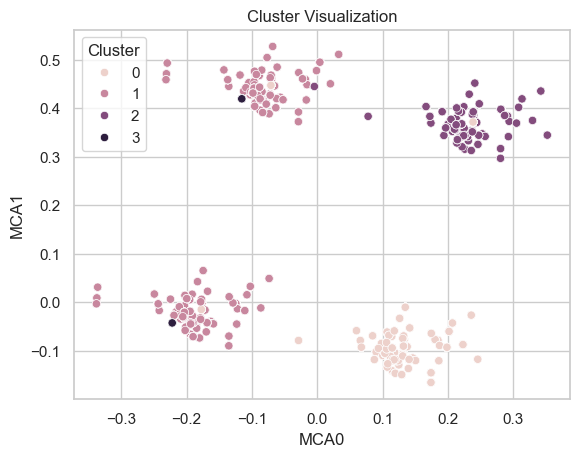

In [77]:
# Dibujamos los clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.

sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

Se crea un gráfico de barras para visualizar la distribución de la variable 'sexo' por cluster en el DataFrame df_FCluster4:

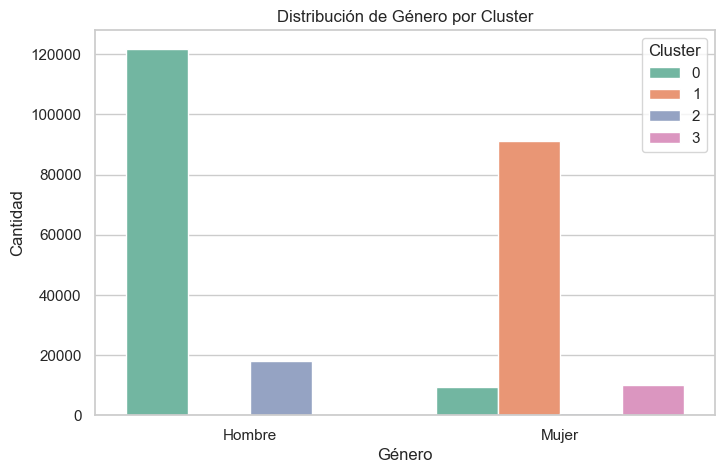

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='sexo', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

Se crea un gráfico de barras horizontal para visualizar la distribución de la variable 'lc1' (condiciones médicas) por cluster en el DataFrame df_FCluster4:

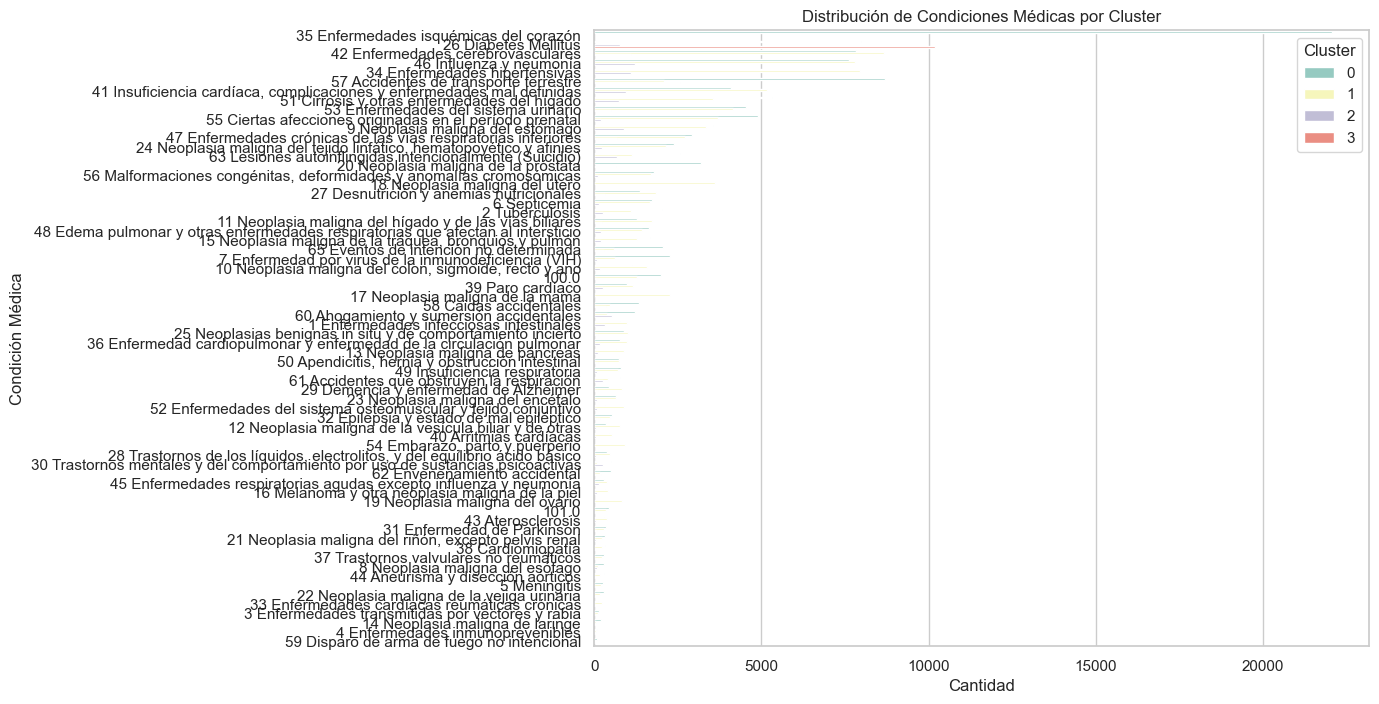

In [79]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='lc1', hue='cluster_labels', data=df_FCluster4, palette='Set3', order=df['lc1'].value_counts().index)

plt.title('Distribución de Condiciones Médicas por Cluster')
plt.xlabel('Cantidad')
plt.ylabel('Condición Médica')
plt.legend(title='Cluster')

plt.show()


Se crea un gráfico de barras para visualizar la distribución de la variable 'area_fall' por cluster en el DataFrame df_FCluster4:

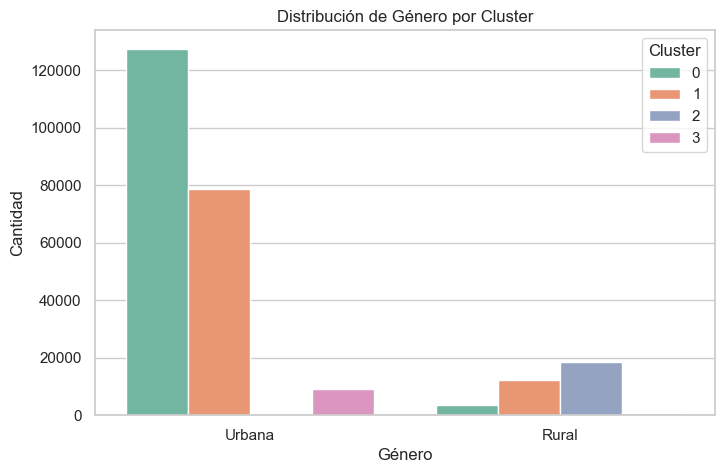

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='area_fall', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

Este código aplica el algoritmo KModes para crear 5 clusters en el DataFrame df_prueba3. Inicializa KModes con 5 clusters, utilizando el método de inicialización 'Huang', y ejecuta el clustering 10 veces para seleccionar la mejor solución. Habilita la salida detallada para mostrar el proceso. Luego, ajusta el modelo a los datos y predice los clusters, guardando las etiquetas de cluster resultantes en clusters_5.

In [81]:
n_clusters = 5
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_5 = km.fit_predict(df_prueba3)
clusters_5

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10619, cost: 248173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10359, cost: 251495.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 111073, cost: 232102.0
Run 3, iteration: 2/100, moves: 704, cost: 232102.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 10834, cost: 250659.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 13369, cost: 233331.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 248855.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 2719, cost: 250186.0
Init: initiali

array([0, 1, 1, ..., 1, 0, 0], dtype=uint16)

Se copia el DataFrame df_prueba3 a df_FCluster5 y añade una columna con las etiquetas de cluster en la cuarta posición, integrando así la información de clusters en el DataFrame original. 

In [82]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster5 = df_prueba3.copy()
df_FCluster5.insert(3,"cluster_labels", clusters_5
)

Se evalúa la calidad del clustering en df_FCluster5 con el Silhouette Score utilizando distancias de Gower. Primero, toma una muestra aleatoria del 20% del DataFrame para reducir su tamaño. Luego, calcula las distancias de Gower entre las filas de la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio, que mide cómo de bien están agrupados los puntos dentro de sus clusters, con K = 4.

In [83]:
import gower
from sklearn.metrics import silhouette_score
# Reduce el tamaño del conjunto de datos tomando una muestra aleatoria más pequeña
df_sample = df_FCluster5.sample(frac=0.2, random_state=42)

# Calcula las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcula el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 4:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 4: 0.25992954


# Prueba 5:

Se carga el archivo CSV

In [88]:
df = pd.read_csv('df_clean.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7648\1955525448.py:1: DtypeWarning: Columns (3,5,8,12,15,43,44,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_clean.csv')


Se muestra las primeras celdas del Dataframe. 

In [89]:
df.head()

prov_insc  cant_insc  parr_insc anio_insc   mes_insc     dia_insc  \
0    El Oro    Machala    Machala    1997.0       Mayo  Desconocido   
1    El Oro  Arenillas  Arenillas    1997.0  Noviembre  Desconocido   
2    El Oro   El Guabo   El Guabo    1997.0      Marzo  Desconocido   
3    El Oro   El Guabo   El Guabo    1997.0  Diciembre  Desconocido   
4    El Oro     Pasaje     Pasaje    1997.0  Noviembre  Desconocido   

    fecha_insc     nac_fall cod_pais    sexo  ...  area_fall area_res  \
0  Desconocido  Desconocido      NaN  Hombre  ...     Urbana   Urbano   
1  Desconocido  Desconocido      NaN  Hombre  ...     Urbana   Urbano   
2  Desconocido  Desconocido      NaN   Mujer  ...     Urbana   Urbano   
3  Desconocido  Desconocido      NaN  Hombre  ...     Urbana   Urbano   
4  Desconocido  Desconocido      NaN  Hombre  ...     Urbana   Urbano   

                                              causa3  \
0                   C16   Tumor maligno del estómago   
1  X74   Lesión autoinfligida intencionalmente po...   
2  G03   Meningitis debida a otras causas y a las...   
3  A16   Tuberculosis respiratoria, no confirmada...   
4  W69   Ahogamiento y sumersión mientras se está...   

                                               causa  \
0                   C16   Tumor maligno del estómago   
1  X74   Lesión autoinfligida intencionalmente po...   
2  G03   Meningitis debida a otras causas y a las...   
3  A16   Tuberculosis respiratoria, no confirmada...   
4  W69   Ahogamiento y sumersión mientras se está...   

                                       causa103  \
0                029 Tumor maligno del estomago   
1  101 Lesiones autoinfligidas intencionalmente   
2                                059 Meningitis   
3                 005 Tuberculosis respiratoria   
4      098 Ahogamiento y sumersión accidentales   

                                        causa80  \
0                027 Tumor maligno del estomago   
1  078 Lesiones autoinfligidas intencionalmente   
2                                049 Meningitis   
3                004 tuberculosis respiratorias   
4      075 Ahogamiento y sumersion accidentales   

                                            causa67A  \
0                           016 Tumores [neoplasias]   
1  060 Causas externas de morbilidad y de mortalidad   
2              026 Enfermedades del sistema nervioso   
3  001 Ciertas enfermedades infecciosas y parasit...   
4  060 Causas externas de morbilidad y de mortalidad   

                                   causa67B  \
0             018 Resto de tumores malignos   
1       067 Todas las demás causas externas   
2                            027 Meningitis   
3                          004 Tuberculosis   
4  062 Ahogamiento y sumersión accidentales   

                                              causa4  \
0  C169  Tumor maligno del estómago, parte no esp...   
1  X749  Lesión autoinfligida intencionalmente po...   
2                  G039  Meningitis, no especificada   
3  A162  Tuberculosis de pulmón, sin mención de c...   
4  W698  Ahogamiento y sumersión mientras se está...   

                                                 lc1  
0                   9 Neoplasia maligna del estómago  
1  63 Lesiones autoinflingidas intencionalmente (...  
2                                       5 Meningitis  
3                                     2 Tuberculosis  
4            60 Ahogamiento y sumersión accidentales  

[5 rows x 49 columns]

Se observa la información y el tipo de los datos. 

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255110 entries, 0 to 1255109
Data columns (total 49 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   prov_insc   1252890 non-null  object 
 1   cant_insc   1252890 non-null  object 
 2   parr_insc   1252890 non-null  object 
 3   anio_insc   1255110 non-null  object 
 4   mes_insc    1255110 non-null  object 
 5   dia_insc    1255110 non-null  object 
 6   fecha_insc  1255110 non-null  object 
 7   nac_fall    1255110 non-null  object 
 8   cod_pais    348675 non-null   object 
 9   sexo        1255110 non-null  object 
 10  anio_nac    1255110 non-null  float64
 11  mes_nac     1255110 non-null  object 
 12  dia_nac     1255110 non-null  object 
 13  anio_fall   1255110 non-null  float64
 14  mes_fall    1255110 non-null  object 
 15  dia_fall    1255110 non-null  object 
 16  fecha_fall  1255110 non-null  object 
 17  cod_edad    1255110 non-null  object 
 18  edad        1255110 no

Se selecciona un subconjunto de columnas específicas ('sexo', 'area_fall', 'lc1') del DataFrame df y guarda el resultado en df_selected. Luego, toma una muestra aleatoria del 20% de las filas de df_selected y la almacena en df_prueba3, asegurando la reproducibilidad con random_state=40.

In [91]:
columns_to_keep = ['sexo', 'area_fall', 'lc1']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba3 = df_selected.sample(frac=0.2, random_state=40);

Se convierte varias columnas del DataFrame df_prueba3 a tipo cadena (str). Las columnas 'sexo', 'area_fall' y 'lc1' se transforman de su tipo original a cadenas de texto para unificar los tipos de datos y facilitar el procesamiento categórico. Luego, ajusta el modelo KModes a df_prueba3 para realizar el clustering en estos datos.

In [96]:
df_prueba3['sexo'] = df_prueba3['sexo'].astype(str)
df_prueba3['area_fall'] = df_prueba3['area_fall'].astype(str)
df_prueba3['lc1'] = df_prueba3['lc1'].astype(str)

# Fit the KModes model
kmode_red.fit_predict(df_prueba3)

array([0, 1, 1, ..., 1, 0, 0], dtype=uint16)

Se utiliza el algoritmo KModes para determinar el valor óptimo de K en el DataFrame df_prueba3. Itera sobre una lista de posibles valores de K, ajusta el modelo KModes a los datos para cada valor y calcula el costo del clustering. Los costos resultantes se almacenan en la lista cost_red para analizar y seleccionar el número óptimo de clusters.

In [97]:
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba3)
  cost_red.append(kmode_red.cost_)

Se visualiza los costos de clustering para diferentes valores de K utilizando el método del codo.

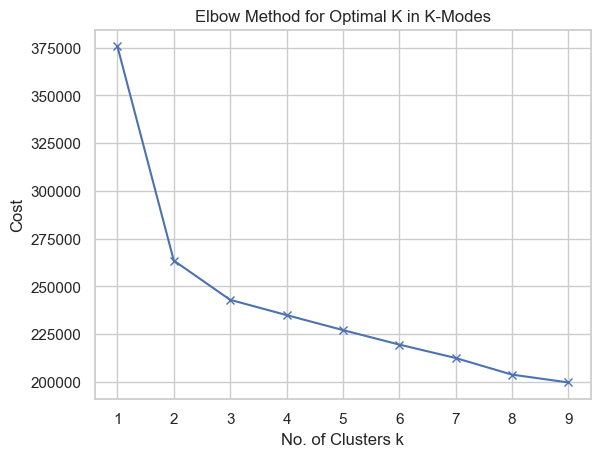

In [98]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Se aplica el algoritmo KModes para crear 3 clusters en el DataFrame df_prueba3. Inicializa KModes con 3 clusters, utilizando el método de inicialización 'Huang', y ejecuta el clustering 10 veces para seleccionar la mejor solución.

In [99]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba3)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9842, cost: 254632.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 91653, cost: 256221.0
Run 2, iteration: 2/100, moves: 0, cost: 256221.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9842, cost: 254795.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 126918, cost: 252773.0
Run 4, iteration: 2/100, moves: 0, cost: 252773.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 126223, cost: 252773.0
Run 5, iteration: 2/100, moves: 0, cost: 252773.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 348361.0
Init: initializing centroids
Init: initializing cl

array([1, 0, 0, ..., 0, 1, 1], dtype=uint16)

Este código copia el DataFrame df_prueba3 a df_FCluster3 y añade una columna con las etiquetas de cluster en la cuarta posición, integrando así la información de clusters en el DataFrame original. 

In [100]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster3 = df_prueba3.copy()
df_FCluster3.insert(3,"cluster_labels", clusters_3)


In [101]:
df_FCluster3

sexo area_fall                                                lc1  \
935151   Hombre    Urbana  47 Enfermedades crónicas de las vías respirato...   
175592    Mujer    Urbana                   9 Neoplasia maligna del estómago   
861969    Mujer    Urbana  25 Neoplasias benignas in situ y de comportami...   
811518    Mujer    Urbana                               26 Diabetes Mellitus   
1062163   Mujer    Urbana              57 Accidentes de transporte terrestre   
...         ...       ...                                                ...   
1203391   Mujer     Rural  41 Insuficiencia cardíaca, complicaciones y en...   
164562   Hombre    Urbana        51 Cirrosis y otras enfermedades del hígado   
1082784   Mujer     Rural  56 Malformaciones congénitas, deformidades y a...   
1051014  Hombre    Urbana              57 Accidentes de transporte terrestre   
215231   Hombre    Urbana                                   39 Paro cardíaco   

         cluster_labels  
935151                1  
175592                0  
861969                0  
811518                0  
1062163               0  
...                 ...  
1203391               0  
164562                1  
1082784               0  
1051014               1  
215231                1  

[251022 rows x 4 columns]

Se evalúa la calidad del clustering en df_FCluster3 utilizando el Silhouette Score con distancias de Gower. Primero, toma una muestra aleatoria del 20% del DataFrame para reducir su tamaño. Luego, calcula las distancias de Gower entre las filas de la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio, que mide cómo de bien están agrupados los puntos dentro de sus clusters, con K = 3.

In [102]:
import gower
from sklearn.metrics import silhouette_score
# Reduce el tamaño del conjunto de datos tomando una muestra aleatoria más pequeña
df_sample = df_FCluster3.sample(frac=0.2, random_state=42)

# Calcula las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcula el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 3: 0.22973743


Se muestra el dataframe 'df_prueba3'

In [103]:
df_prueba3

sexo area_fall                                                lc1
935151   Hombre    Urbana  47 Enfermedades crónicas de las vías respirato...
175592    Mujer    Urbana                   9 Neoplasia maligna del estómago
861969    Mujer    Urbana  25 Neoplasias benignas in situ y de comportami...
811518    Mujer    Urbana                               26 Diabetes Mellitus
1062163   Mujer    Urbana              57 Accidentes de transporte terrestre
...         ...       ...                                                ...
1203391   Mujer     Rural  41 Insuficiencia cardíaca, complicaciones y en...
164562   Hombre    Urbana        51 Cirrosis y otras enfermedades del hígado
1082784   Mujer     Rural  56 Malformaciones congénitas, deformidades y a...
1051014  Hombre    Urbana              57 Accidentes de transporte terrestre
215231   Hombre    Urbana                                   39 Paro cardíaco

[251022 rows x 3 columns]

Este código convierte las variables categóricas del DataFrame df_prueba3 en variables dummy/indicadoras usando la función pd.get_dummies() de pandas. Esto transforma cada categoría en una columna binaria (0 o 1), facilitando así el análisis y procesamiento de datos categóricos.

In [104]:
df_categorical = pd.get_dummies(df_prueba3)
df_categorical

sexo_Hombre  sexo_Mujer  area_fall_Rural  area_fall_Urbana  \
935151          True       False            False              True   
175592         False        True            False              True   
861969         False        True            False              True   
811518         False        True            False              True   
1062163        False        True            False              True   
...              ...         ...              ...               ...   
1203391        False        True             True             False   
164562          True       False            False              True   
1082784        False        True             True             False   
1051014         True       False            False              True   
215231          True       False            False              True   

         lc1_1 Enfermedades infecciosas intestinales  \
935151                                         False   
175592                                         False   
861969                                         False   
811518                                         False   
1062163                                        False   
...                                              ...   
1203391                                        False   
164562                                         False   
1082784                                        False   
1051014                                        False   
215231                                         False   

         lc1_10 Neoplasia maligna del colon, sigmoide, recto y ano  lc1_100.0  \
935151                                               False              False   
175592                                               False              False   
861969                                               False              False   
811518                                               False              False   
1062163                                              False              False   
...                                                    ...                ...   
1203391                                              False              False   
164562                                               False              False   
1082784                                              False              False   
1051014                                              False              False   
215231                                               False              False   

         lc1_101.0  \
935151       False   
175592       False   
861969       False   
811518       False   
1062163      False   
...            ...   
1203391      False   
164562       False   
1082784      False   
1051014      False   
215231       False   

         lc1_11 Neoplasia maligna del hígado y de las vías biliares  \
935151                                               False            
175592                                               False            
861969                                               False            
811518                                               False            
1062163                                              False            
...                                                    ...            
1203391                                              False            
164562                                               False            
1082784                                              False            
1051014                                              False            
215231                                               False            

         lc1_12 Neoplasia maligna de la vesícula biliar y de otras  ...  \
935151                                               False          ...   
175592                                               False          ...   
861969                                               False          ...   
811518                                               False          ...   
1062163          

Se aplica el Análisis de Correspondencias Múltiples (MCA) al DataFrame df_categorical. Configura MCA para obtener 5 componentes y ajusta el modelo a los datos. Luego, transforma el conjunto de datos, obteniendo las coordenadas de cada muestra en los nuevos ejes definidos por MCA, y almacena estas coordenadas en mca_coordinates.

In [105]:
# Indicamos el número de componentes que requerimos
import prince
mca = prince.MCA(n_components=5)
# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categorical)
mca
# Transforme el conjunto de datos (esto le dará las coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categorical)
mca_coordinates

0         1         2         3         4
935151   0.130920 -0.074685  0.012025  0.015075 -0.156374
175592  -0.177206  0.006305  0.034689  0.058225 -0.127462
861969  -0.205805 -0.029459 -0.004772  0.163992  0.075931
811518  -0.222020 -0.042602 -0.079298 -0.333269  0.029918
1062163 -0.110836 -0.017170 -0.160801 -0.045467  0.053661
...           ...       ...       ...       ...       ...
1203391 -0.093242  0.469621 -0.030847  0.113125  0.010319
164562   0.140662 -0.117700 -0.021026  0.015489  0.019393
1082784 -0.095713  0.404412  0.018003  0.027815 -0.134909
1051014  0.198491 -0.092727 -0.161039 -0.047047  0.053667
215231   0.117886 -0.059439  0.022283  0.078820  0.043405

[251022 rows x 5 columns]

ESe añade una columna con las etiquetas de los clusters de K = 3 al DataFrame mca_coordinates, utilizando las etiquetas de df_FCluster3. Esto integra la información de los clusters en el conjunto de datos transformado por MCA.

In [106]:
# Agregamos una columna con la etiqueta de los clusters. K = 2
mca_coordinates['cluster_labels'] = df_FCluster3['cluster_labels']
mca_coordinates

0         1         2         3         4  cluster_labels
935151   0.130920 -0.074685  0.012025  0.015075 -0.156374               1
175592  -0.177206  0.006305  0.034689  0.058225 -0.127462               0
861969  -0.205805 -0.029459 -0.004772  0.163992  0.075931               0
811518  -0.222020 -0.042602 -0.079298 -0.333269  0.029918               0
1062163 -0.110836 -0.017170 -0.160801 -0.045467  0.053661               0
...           ...       ...       ...       ...       ...             ...
1203391 -0.093242  0.469621 -0.030847  0.113125  0.010319               0
164562   0.140662 -0.117700 -0.021026  0.015489  0.019393               1
1082784 -0.095713  0.404412  0.018003  0.027815 -0.134909               0
1051014  0.198491 -0.092727 -0.161039 -0.047047  0.053667               1
215231   0.117886 -0.059439  0.022283  0.078820  0.043405               1

[251022 rows x 6 columns]

Se realiza la visualización de los clusters: 

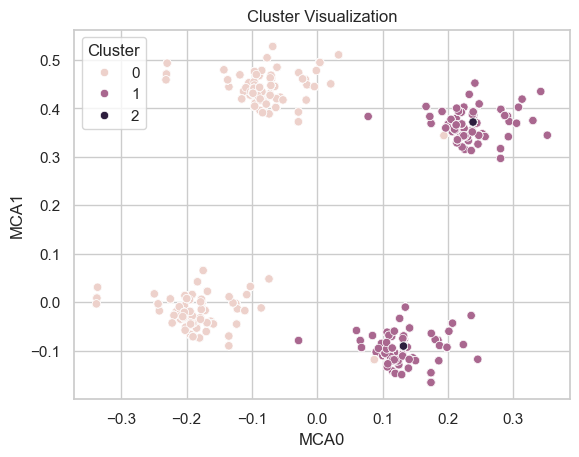

In [107]:
# Dibujamos los clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.

sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

# Prueba 6:

Se selecciona un subconjunto de columnas específicas ('sexo', 'edad', 'etnia', 'est_civil', 'niv_inst', 'area_res', 'lc1') del DataFrame df y guarda el resultado en df_selected. Luego, toma una muestra aleatoria del 20% de las filas de df_selected y la almacena en df_prueba4, asegurando la reproducibilidad con random_state=40.

In [108]:
columns_to_keep = ['sexo', 'edad', 'etnia', 'est_civil', 'niv_inst', 'area_res', 'lc1']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba4 = df_selected.sample(frac=0.2, random_state=40);

Se convierte varias columnas del DataFrame df_prueba4 a tipo cadena (str) para unificar los tipos de datos y facilitar el procesamiento categórico. Las columnas 'sexo', 'edad', 'etnia', 'est_civil', 'niv_inst', 'area_res' y 'lc1' se transforman de su tipo original a cadenas de texto. Luego, ajusta el modelo KModes a df_prueba4 para realizar el clustering en estos datos.

In [109]:
# Convert columns with mixed data types to string
df_prueba4['sexo'] = df_prueba4['sexo'].astype(str)
df_prueba4['edad'] = df_prueba4['edad'].astype(str)
df_prueba4['etnia'] = df_prueba4['etnia'].astype(str)
df_prueba4['est_civil'] = df_prueba4['est_civil'].astype(str)
df_prueba4['niv_inst'] = df_prueba4['niv_inst'].astype(str)
df_prueba4['area_res'] = df_prueba4['area_res'].astype(str)
df_prueba4['lc1'] = df_prueba4['lc1'].astype(str)


# Fit the KModes model
kmode_red.fit_predict(df_prueba4)

array([0, 1, 5, ..., 1, 0, 8], dtype=uint16)

Se utiliza el algoritmo KModes para determinar el valor óptimo de K (número de clusters) en el DataFrame df_prueba4. Itera sobre una lista de posibles valores de K (de 1 a 9), ajusta el modelo KModes a los datos para cada valor y calcula el costo del clustering. Los costos resultantes se almacenan en la lista cost_red para analizar y seleccionar el número óptimo de clusters.

In [110]:
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba4)
  cost_red.append(kmode_red.cost_)

Se muestra el gráfico de Codo para el analisis de los clusters. 

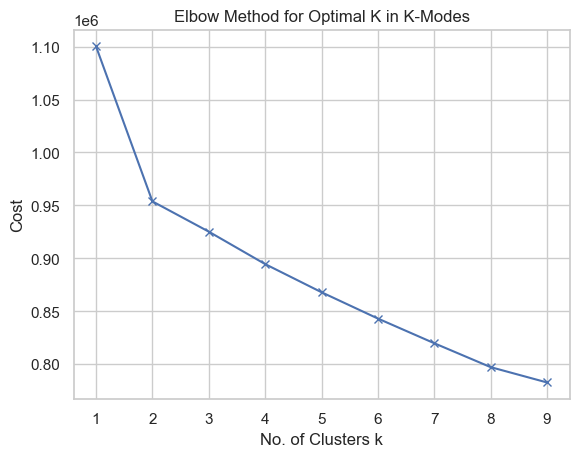

In [111]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Se aplica KModes para crear 4 clusters en df_prueba3, usando la inicialización 'Huang' y ejecutando el clustering 10 veces para seleccionar la mejor solución. Las etiquetas de cluster resultantes se guardan en clusters_4.

In [112]:
n_clusters = 4
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_4 = km.fit_predict(df_prueba3)
clusters_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 337327.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10883, cost: 245001.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 17094, cost: 228517.0
Run 3, iteration: 2/100, moves: 0, cost: 228517.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 263, cost: 336864.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 22392, cost: 233668.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 13235, cost: 243128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 10359, cost: 256014.0
Init: initializing

array([1, 2, 2, ..., 0, 1, 1], dtype=uint16)

Se copia el DataFrame df_prueba4 a df_FCluster4 y añade una columna con las etiquetas de cluster en la octava posición, integrando así la información de clusters en el DataFrame original. Las etiquetas de cluster, generadas previamente con KModes, se almacenan en la columna 'cluster_labels' de df_FCluster4.

In [113]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster4 = df_prueba4.copy()
df_FCluster4.insert(7 ,"cluster_labels", clusters_4)

Se evalúa la calidad del clustering en df_FCluster4 utilizando el Silhouette Score con distancias de Gower. Primero, toma una muestra aleatoria del 20% del DataFrame para reducir su tamaño. Luego, calcula las distancias de Gower entre las filas de la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio, que mide cómo de bien están agrupados los puntos dentro de sus clusters, con K = 4.

In [114]:
import gower
from sklearn.metrics import silhouette_score
# Reducir el tamaño del conjunto de datos tomando una muestra aleatoria más pequeña
df_sample = df_FCluster4.sample(frac=0.2, random_state=42)

# Calcular las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 4:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 4: 0.11265944


Se aplica KModes para crear 3 clusters en df_prueba3, usando la inicialización 'Huang' y ejecutando el clustering 10 veces para seleccionar la mejor solución. Las etiquetas de cluster resultantes se guardan en clusters_3.

In [115]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba3)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 356535.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11359, cost: 262482.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 12363, cost: 255347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 10461, cost: 252773.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 10834, cost: 258413.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 255347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 13217, cost: 261568.0
Init: initializing centroids
Init: initializing clusters
Starting iter

array([2, 0, 0, ..., 0, 2, 2], dtype=uint16)

Se copia el DataFrame df_prueba4 a df_FCluster3 y añade una columna con las etiquetas de cluster en la octava posición, integrando así la información de clusters en el DataFrame original. Las etiquetas de cluster, generadas previamente con KModes, se almacenan en la columna 'cluster_labels' de df_FCluster3.

In [116]:
df_FCluster3 = df_prueba4.copy()
df_FCluster3.insert(7 ,"cluster_labels", clusters_3)

In [117]:
df_FCluster3

sexo  edad            etnia      est_civil          niv_inst  \
935151   Hombre  75.0          Mestizo      Casado(a)          Superior   
175592    Mujer  48.0      Desconocido     Soltero(a)          Primaria   
861969    Mujer  85.0           Blanco       Viudo(a)          Primaria   
811518    Mujer  51.0          Mestizo     Soltero(a)          Superior   
1062163   Mujer  17.0          Mestizo     Soltero(a)  Educación Básica   
...         ...   ...              ...            ...               ...   
1203391   Mujer  92.0          Mestizo  Divorciado(a)           Ninguno   
164562   Hombre  60.0      Desconocido       Unido(a)          Primaria   
1082784   Mujer  48.0  Sin información     Soltero(a)           Ninguno   
1051014  Hombre  41.0          Mestizo     Soltero(a)          Primaria   
215231   Hombre   1.0      Desconocido    Desconocido           Ninguno   

        area_res                                                lc1  \
935151    Urbano  47 Enfermedades crónicas de las vías respirato...   
175592    Urbano                   9 Neoplasia maligna del estómago   
861969    Urbano  25 Neoplasias benignas in situ y de comportami...   
811518    Urbano                               26 Diabetes Mellitus   
1062163   Urbano              57 Accidentes de transporte terrestre   
...          ...                                                ...   
1203391    Rural  41 Insuficiencia cardíaca, complicaciones y en...   
164562    Urbano        51 Cirrosis y otras enfermedades del hígado   
1082784    Rural  56 Malformaciones congénitas, deformidades y a...   
1051014   Urbano              57 Accidentes de transporte terrestre   
215231    Urbano                                   39 Paro cardíaco   

         cluster_labels  
935151                2  
175592                0  
861969                0  
811518                0  
1062163               0  
...                 ...  
1203391               0  
164562                2  
1082784               0  
1051014               2  
215231                2  

[251022 rows x 8 columns]

Se evalúa la calidad del clustering en df_FCluster3 utilizando el Silhouette Score con distancias de Gower. Primero, toma una muestra aleatoria del 20% de df_FCluster3. Luego, calcula las distancias de Gower para la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio para evaluar cómo de bien están agrupados los puntos dentro de sus clusters con K = 3.

In [118]:
import gower
from sklearn.metrics import silhouette_score
# Reducir el tamaño del conjunto de datos tomando una muestra aleatoria del 20%
df_sample = df_FCluster3.sample(frac=0.2, random_state=42)

# Calcular las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 3: 0.13208298


Se selecciona un subconjunto de columnas específicas ('muj_fertil', 'lc1', 'autopsia', 'lugar_ocur') del DataFrame df y guarda el resultado en df_selected. Luego, toma una muestra aleatoria del 20% de las filas de df_selected y la almacena en df_prueba5, asegurando la reproducibilidad con random_state=40.

In [119]:
# Seleccionar las columnas especificadas
columns_to_keep = ['muj_fertil', 'lc1', 'autopsia', 'lugar_ocur']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba5 = df_selected.sample(frac=0.2, random_state=40);

Se convierte varias columnas del DataFrame df_prueba5 a tipo cadena (str) para unificar los tipos de datos y facilitar el procesamiento categórico. Las columnas 'muj_fertil', 'autopsia', 'lc1' y 'lugar_ocur' se transforman de su tipo original a cadenas de texto. Luego, ajusta el modelo KModes a df_prueba5 para realizar el clustering en estos datos.

In [120]:
# Convertir las columnas con tipos de datos mixtos a cadenas de texto (string)
df_prueba5['muj_fertil'] = df_prueba5['muj_fertil'].astype(str)
df_prueba5['autopsia'] = df_prueba5['autopsia'].astype(str)
df_prueba5['lc1'] = df_prueba5['lc1'].astype(str)
df_prueba5['lugar_ocur'] = df_prueba5['lugar_ocur'].astype(str)

# Ajustar el modelo KModes
kmode_red.fit_predict(df_prueba5)

array([1, 0, 4, ..., 5, 3, 0], dtype=uint16)

Se utiliza el algoritmo KModes para determinar el valor óptimo de K (número de clusters) en el DataFrame df_prueba3. Itera sobre una lista de posibles valores de K (de 1 a 9), ajusta el modelo KModes a los datos para cada valor y calcula el costo del clustering. Los costos resultantes se almacenan en la lista cost_red para analizar y seleccionar el número óptimo de clusters.

In [121]:
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba3)
  cost_red.append(kmode_red.cost_)

Se realiza el gráfico del codo para observar los valores de K. 

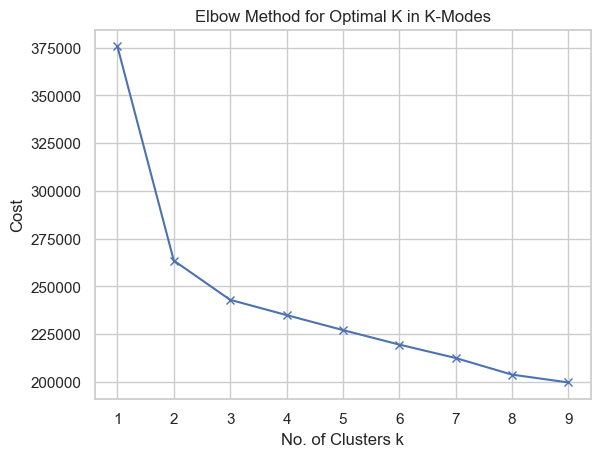

In [122]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Se aplica KModes para crear 3 clusters en df_prueba5, usando la inicialización 'Huang' y ejecutando el clustering 10 veces para seleccionar la mejor solución. Las etiquetas de cluster resultantes se guardan en clusters_3.

In [123]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba5)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 50396, cost: 402191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 84454, cost: 388813.0
Run 2, iteration: 2/100, moves: 6955, cost: 388813.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6976, cost: 392338.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 458471.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 61408, cost: 389213.0
Run 5, iteration: 2/100, moves: 343, cost: 389213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 30652, cost: 388154.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration

array([1, 0, 1, ..., 0, 2, 0], dtype=uint16)

Se copia el DataFrame df_prueba5 a df_FCluster5 y añade una columna con las etiquetas de cluster en la cuarta posición, integrando así la información de clusters en el DataFrame original. Las etiquetas de cluster, generadas previamente con KModes, se almacenan en la columna 'cluster_labels' de df_FCluster5.

In [124]:
# Insertemos las etiquetas en nuestro dataset original.
df_FCluster5 = df_prueba5.copy()
df_FCluster5.insert(3,"cluster_labels", clusters_3)

Se evalúa la calidad del clustering en df_FCluster5 utilizando el Silhouette Score con distancias de Gower. Primero, toma una muestra aleatoria del 20% de df_FCluster5. Luego, calcula las distancias de Gower para la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio para evaluar cómo de bien están agrupados los puntos dentro de sus clusters con K = 3.

In [125]:
import gower
from sklearn.metrics import silhouette_score
# Reduce the size of the dataset by randomly sampling a smaller portion of the data
df_sample = df_FCluster5.sample(frac=0.2, random_state=42)

# Calculate the Gower distances using the sampled dataset
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calculate the Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 3: 0.20799908


# Prueba 7:

Se selecciona un subconjunto de columnas específicas ('mor_viol', 'lug_viol', 'fecha_fall', 'lc1') del DataFrame df y guarda el resultado en df_selected. Luego, toma una muestra aleatoria del 20% de las filas de df_selected y la almacena en df_prueba6, asegurando la reproducibilidad con random_state=40.

In [126]:
# Seleccionar las columnas especificadas
columns_to_keep = ['mor_viol', 'lug_viol','fecha_fall','lc1']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba6 = df_selected.sample(frac=0.2, random_state=40);

Se convierte varias columnas del DataFrame df_prueba6 a tipo cadena (str) para unificar los tipos de datos y facilitar el procesamiento categórico. Las columnas 'mor_viol', 'lug_viol', 'fecha_fall' y 'lc1' se transforman de su tipo original a cadenas de texto. Luego, ajusta el modelo KModes a df_prueba6 para realizar el clustering en estos datos.

In [127]:
# Convert columns with mixed data types to string
df_prueba6['mor_viol'] = df_prueba6['mor_viol'].astype(str)
df_prueba6['lug_viol'] = df_prueba6['lug_viol'].astype(str)
df_prueba6['fecha_fall'] = df_prueba6['fecha_fall'].astype(str)
df_prueba6['lc1'] = df_prueba6['lc1'].astype(str)


# Fit the KModes model
kmode_red.fit_predict(df_prueba6)

array([0, 0, 0, ..., 0, 5, 0], dtype=uint16)

Se utiliza el algoritmo KModes para determinar el valor óptimo de K (número de clusters) en el DataFrame df_prueba6. Itera sobre una lista de posibles valores de K (de 1 a 9), ajusta el modelo KModes a los datos para cada valor y calcula el costo del clustering. Los costos resultantes se almacenan en la lista cost_red para analizar y seleccionar el número óptimo de clusters.

In [128]:
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba6)
  cost_red.append(kmode_red.cost_)

Se realiza el grafico del codo, para observar el valor del codo. 

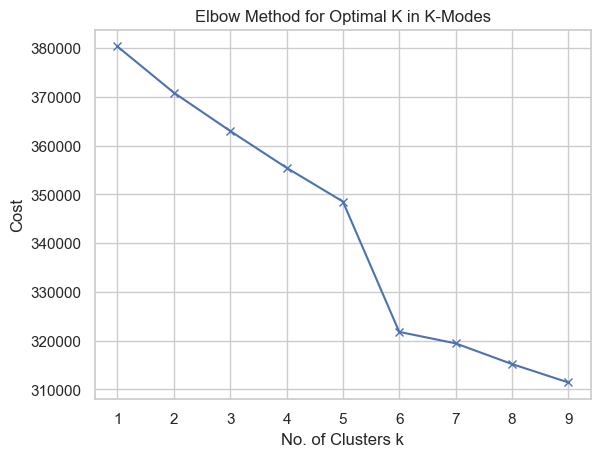

In [129]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Se aplica KModes para crear 5 clusters en df_prueba6, usando la inicialización 'Huang' y ejecutando el clustering 10 veces para seleccionar la mejor solución. Las etiquetas de cluster resultantes se guardan en clusters_5.

In [130]:
n_clusters = 5
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_5 = km.fit_predict(df_prueba6)
clusters_5

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 107648, cost: 333684.0
Run 1, iteration: 2/100, moves: 2, cost: 333684.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 123248, cost: 312084.0
Run 2, iteration: 2/100, moves: 862, cost: 312084.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8, cost: 345741.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 121314, cost: 349239.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5, cost: 365982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 112689, cost: 333478.0
Run 6, iteration: 2/100, moves: 0, cost: 333478.0
Init: initializing centroids
Init: initializing 

array([0, 4, 0, ..., 0, 2, 0], dtype=uint16)

Se copia el DataFrame df_prueba6 a df_FCluster6 y añade una columna con las etiquetas de cluster en la quinta posición, integrando así la información de clusters en el DataFrame original. Las etiquetas de cluster, generadas previamente con KModes, se almacenan en la columna 'cluster_labels' de df_FCluster6.

In [131]:
df_FCluster6 = df_prueba6.copy()
df_FCluster6.insert(4,"cluster_labels", clusters_5)

Se evalúa la calidad del clustering en df_FCluster6 utilizando el Silhouette Score con distancias de Gower. Primero, toma una muestra aleatoria del 20% de df_FCluster6. Luego, calcula las distancias de Gower para la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio para evaluar cómo de bien están agrupados los puntos dentro de sus clusters con K = 5.

In [132]:
import gower
from sklearn.metrics import silhouette_score

# Reducir el tamaño del conjunto de datos tomando una muestra aleatoria del 20%
df_sample = df_FCluster6.sample(frac=0.2, random_state=42)

# Calcular las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 3: 0.0947693


# Prueba 8

Se selecciona un subconjunto de columnas específicas ('niv_inst', 'etnia', 'lc1', 'est_civil') del DataFrame df y guarda el resultado en df_selected. Luego, toma una muestra aleatoria del 20% de las filas de df_selected y la almacena en df_prueba7, asegurando la reproducibilidad con random_state=40.

In [133]:
columns_to_keep = ['niv_inst', 'etnia','lc1', 'est_civil']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba7 = df_selected.sample(frac=0.2, random_state=40);

Se convierte varias columnas del DataFrame df_prueba7 a tipo cadena (str) para unificar los tipos de datos y facilitar el procesamiento categórico. Las columnas 'niv_inst', 'etnia', 'est_civil' y 'lc1' se transforman de su tipo original a cadenas de texto. Luego, ajusta el modelo KModes a df_prueba7 para realizar el clustering en estos datos.

In [134]:
# Convert columns with mixed data types to string
df_prueba7['niv_inst'] = df_prueba7['niv_inst'].astype(str)
df_prueba7['etnia'] = df_prueba7['etnia'].astype(str)
df_prueba7['est_civil'] = df_prueba7['est_civil'].astype(str)
df_prueba7['lc1'] = df_prueba7['lc1'].astype(str)

# Fit the KModes model
kmode_red.fit_predict(df_prueba7)


array([0, 8, 2, ..., 1, 6, 1], dtype=uint16)

Se utiliza el algoritmo KModes para determinar el valor óptimo de K (número de clusters) en el DataFrame df_prueba7. Itera sobre una lista de posibles valores de K (de 1 a 9), ajusta el modelo KModes a los datos para cada valor y calcula el costo del clustering. Los costos resultantes se almacenan en la lista cost_red para analizar y seleccionar el número óptimo de clusters.

In [135]:
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba7)
  cost_red.append(kmode_red.cost_)

Se realiza el grafico del codo, para observar los valores de K. 

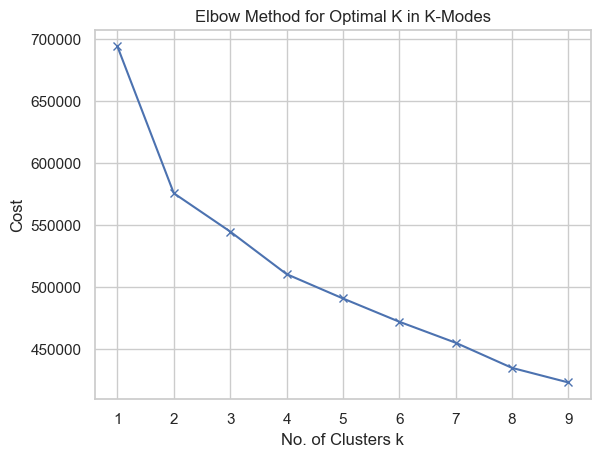

In [136]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Se aplica KModes para crear 4 clusters en df_prueba7, usando la inicialización 'Huang' y ejecutando el clustering 10 veces para seleccionar la mejor solución. Las etiquetas de cluster resultantes se guardan en clusters_4.

In [137]:
n_clusters = 4
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_4 = km.fit_predict(df_prueba7)
clusters_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 99614, cost: 525014.0
Run 1, iteration: 2/100, moves: 3516, cost: 525014.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 55565, cost: 551384.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 14025, cost: 558068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 56449, cost: 520195.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 19374, cost: 537636.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 50576, cost: 510174.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 77581, cost: 512375.0
Run 7, it

array([0, 0, 0, ..., 0, 0, 3], dtype=uint16)

Se copia el DataFrame df_prueba7 a df_FCluster4 y añade una columna con las etiquetas de cluster en la cuarta posición, integrando así la información de clusters en el DataFrame original. Las etiquetas de cluster, generadas previamente con KModes, se almacenan en la columna 'cluster_labels' de df_FCluster4.

In [138]:
df_FCluster4 = df_prueba7.copy()
df_FCluster4.insert(3,"cluster_labels", clusters_4)


Evaluamos la calidad del clustering en df_FCluster4 utilizando el Silhouette Score con distancias de Gower. Primero, toma una muestra aleatoria del 20% de df_FCluster4. Luego, calcula las distancias de Gower para la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio para evaluar cómo de bien están agrupados los puntos dentro de sus clusters con K = 4.

In [139]:
import gower
from sklearn.metrics import silhouette_score
# Reducir el tamaño del conjunto de datos tomando una muestra aleatoria del 20%
df_sample = df_FCluster4.sample(frac=0.2, random_state=42)

# Calcular las distancias de Gower utilizando el conjunto de datos 
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 4:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 4: 0.10850025


Seleccionamos un subconjunto de columnas específicas ('edad', 'lc1', 'lugar_ocur', 'area_fall', 'autopsia') del DataFrame df y guarda el resultado en df_selected. Luego, toma una muestra aleatoria del 20% de las filas de df_selected y la almacena en df_prueba8, asegurando la reproducibilidad con random_state=40.

In [171]:
# Seleccionar las columnas especificadas
columns_to_keep = ['edad', 'lc1','lugar_ocur', 'area_fall', 'autopsia']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba8 = df_selected.sample(frac=0.2, random_state=40);

Se utiliza el algoritmo KModes para determinar el valor óptimo de K (número de clusters) en el DataFrame df_prueba8. Itera sobre una lista de posibles valores de K (de 1 a 9), ajusta el modelo KModes a los datos para cada valor y calcula el costo del clustering. Los costos resultantes se almacenan en la lista cost_red para analizar y seleccionar el número óptimo de clusters.

In [174]:
from kmodes.kmodes import KModes
# Determinamos el valor óptimo de K

cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba8)
  cost_red.append(kmode_red.cost_)

Se convierte varias columnas del DataFrame df_prueba8 a tipo cadena (str) para unificar los tipos de datos y facilitar el procesamiento categórico. Las columnas 'edad', 'lugar_ocur', 'lc1', 'area_fall' y 'autopsia' se transforman de su tipo original a cadenas de texto. Luego, ajusta el modelo KModes a df_prueba8 para realizar el clustering en estos datos.

In [173]:
# Convertir las columnas con tipos de datos mixtos a cadenas de texto (string)
df_prueba8['edad'] = df_prueba8['edad'].astype(str)
df_prueba8['lugar_ocur'] = df_prueba8['lugar_ocur'].astype(str)
df_prueba8['lc1'] = df_prueba8['lc1'].astype(str)
df_prueba8['area_fall'] = df_prueba8['area_fall'].astype(str)
df_prueba8['autopsia'] = df_prueba8['autopsia'].astype(str)


# Ajustar el modelo KModes
kmode_red.fit_predict(df_prueba8)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

Se realiza el gráfico de codo, para observar los valores de K. 

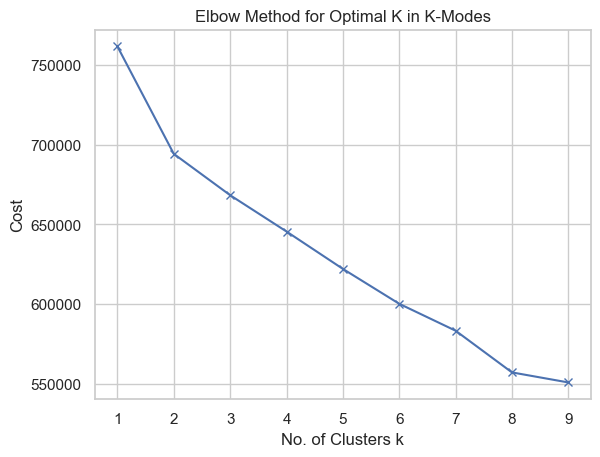

In [ ]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Aplicamos KModes para crear 3 clusters en df_prueba8, usando la inicialización 'Huang' y ejecutando el clustering 10 veces para seleccionar la mejor solución. Las etiquetas de cluster resultantes se guardan en clusters_3.

In [ ]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba8)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 48694, cost: 660416.0
Run 1, iteration: 2/100, moves: 31746, cost: 660416.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2504, cost: 683184.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4822, cost: 670935.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 40940, cost: 676129.0
Run 4, iteration: 2/100, moves: 534, cost: 675854.0
Run 4, iteration: 3/100, moves: 142, cost: 675854.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 46733, cost: 666514.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 13973, cost: 676262.0
Init: initializing centroids
Init: initi

array([2, 0, 2, ..., 1, 0, 0], dtype=uint16)

Se copia el DataFrame df_prueba8 a df_FCluster3 y añade una columna con las etiquetas de cluster en la sexta posición, integrando así la información de clusters en el DataFrame original. Las etiquetas de cluster, generadas previamente con KModes, se almacenan en la columna 'cluster_labels' de df_FCluster3.

In [ ]:
df_FCluster3 = df_prueba8.copy()
df_FCluster3.insert(5,"cluster_labels", clusters_3)


Se evalúa la calidad del clustering en df_FCluster3 utilizando el Silhouette Score con distancias de Gower. Primero, toma una muestra aleatoria del 20% de df_FCluster3. Luego, calcula las distancias de Gower para la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio para evaluar cómo de bien están agrupados los puntos dentro de sus clusters con K = 3.

In [ ]:
import gower
from sklearn.metrics import silhouette_score
# Reducir el tamaño del conjunto de datos tomando una muestra aleatoria del 20%
df_sample = df_FCluster3.sample(frac=0.2, random_state=42)

# Calcular las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 3: 0.19907011


Se aplica KModes para crear 4 clusters en df_prueba8, usando la inicialización 'Huang' y ejecutando el clustering 10 veces para seleccionar la mejor solución. Las etiquetas de cluster resultantes se guardan en clusters_4.

In [ ]:
n_clusters = 4
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_4 = km.fit_predict(df_prueba8)
clusters_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9657, cost: 640749.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2685, cost: 687492.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 17682, cost: 645606.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 57252, cost: 653322.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 19520, cost: 625990.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 49580, cost: 631923.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 33997, cost: 666747.0
Run 7, iteration: 2/100, moves: 1248, cost: 666747.0
Init: initi

array([0, 2, 0, ..., 1, 0, 2], dtype=uint16)

Se copia el DataFrame df_prueba8 a df_FCluster4 y añade una columna con las etiquetas de cluster en la sexta posición, integrando así la información de clusters en el DataFrame original. Las etiquetas de cluster, generadas previamente con KModes, se almacenan en la columna 'cluster_labels' de df_FCluster4.

In [ ]:
df_FCluster4 = df_prueba8.copy()
df_FCluster4.insert(5,"cluster_labels", clusters_4)

Se evalúa la calidad del clustering en df_FCluster4 utilizando el Silhouette Score con distancias de Gower. Primero, toma una muestra aleatoria del 20% de df_FCluster4. Luego, calcula las distancias de Gower para la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio para evaluar cómo de bien están agrupados los puntos dentro de sus clusters con K = 4.

In [ ]:
import gower
from sklearn.metrics import silhouette_score
# Reducir el tamaño del conjunto de datos tomando una muestra aleatoria del 20%
df_sample = df_FCluster4.sample(frac=0.2, random_state=42)

# Calcular las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 4:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 4: 0.10565465


Se convierte las variables categóricas del DataFrame df_prueba8 en variables dummy/indicadoras usando la función pd.get_dummies() de pandas. Esto transforma cada categoría en una columna binaria (0 o 1), facilitando así el análisis y procesamiento de datos categóricos. El DataFrame resultante se guarda en df_categorical2.

In [ ]:
df_categorical2 = pd.get_dummies(df_prueba8)
df_categorical2

edad_0.0  edad_1.0  edad_10.0  edad_100.0  edad_101.0  edad_102.0  \
935151      False     False      False       False       False       False   
175592      False     False      False       False       False       False   
861969      False     False      False       False       False       False   
811518      False     False      False       False       False       False   
1062163     False     False      False       False       False       False   
...           ...       ...        ...         ...         ...         ...   
1203391     False     False      False       False       False       False   
164562      False     False      False       False       False       False   
1082784     False     False      False       False       False       False   
1051014     False     False      False       False       False       False   
215231      False      True      False       False       False       False   

         edad_103.0  edad_104.0  edad_105.0  edad_106.0  ...  \
935151        False       False       False       False  ...   
175592        False       False       False       False  ...   
861969        False       False       False       False  ...   
811518        False       False       False       False  ...   
1062163       False       False       False       False  ...   
...             ...         ...         ...         ...  ...   
1203391       False       False       False       False  ...   
164562        False       False       False       False  ...   
1082784       False       False       False       False  ...   
1051014       False       False       False       False  ...   
215231        False       False       False       False  ...   

         lugar_ocur_Hospital, clínica o consultorio privado  lugar_ocur_Otro  \
935151                                                True             False   
175592                                               False             False   
861969                                               False             False   
811518                                               False             False   
1062163                                              False             False   
...                                                    ...               ...   
1203391                                              False             False   
164562                                               False             False   
1082784                                              False             False   
1051014                                              False              True   
215231                                               False             False   

         lugar_ocur_Otros establecimientos públicos  \
935151                                        False   
175592                                        False   
861969                                        False   
811518                                        False   
1062163                                       False   
...                                             ...   
1203391                                       False   
164562                                        False   
1082784                                       False   
1051014                                       False   
215231                                        False   

         lugar_ocur_Sin información  area_fall_Rural  area_fall_Urbana  \
935151                        False            False              True   
175592                        False            False              True   
861969                        False            False              True   
811518                        False            False              True   
1062163                       False            False              True   
...                             ...              ...               ...   
1203391                       False             True             False   
164562                        False            False              True   
1082784        

Se aplica el Análisis de Correspondencias Múltiples (MCA) al DataFrame df_categorical2. Configura MCA para obtener 2 componentes y ajusta el modelo a los datos. Luego, transforma el conjunto de datos, obteniendo las coordenadas de cada muestra en los nuevos ejes definidos por MCA, y almacena estas coordenadas en mca_coordinates.

In [ ]:
# Indicamos el número de componentes que requerimos
import prince
mca = prince.MCA(n_components=2)
# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categorical2)
mca
# Transforme el conjunto de datos (esto le dará las coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categorical2)
mca_coordinates

0         1
935151  -0.041991 -0.088937
175592  -0.041452  0.038248
861969  -0.088696 -0.035681
811518   0.003720 -0.116591
1062163  0.309496  0.039586
...           ...       ...
1203391 -0.155694  0.231089
164562  -0.038214 -0.006831
1082784 -0.056729  0.153255
1051014  0.390513  0.128214
215231  -0.013714  0.016829

[251022 rows x 2 columns]

Se añade una columna con las etiquetas de los clusters de K = 3 al DataFrame mca_coordinates, utilizando las etiquetas de df_FCluster3. Esto integra la información de los clusters en el conjunto de datos transformado por MCA.

In [ ]:
mca_coordinates['cluster_labels'] = df_FCluster3['cluster_labels']
mca_coordinates

0         1  cluster_labels
935151  -0.041991 -0.088937               2
175592  -0.041452  0.038248               0
861969  -0.088696 -0.035681               2
811518   0.003720 -0.116591               1
1062163  0.309496  0.039586               0
...           ...       ...             ...
1203391 -0.155694  0.231089               1
164562  -0.038214 -0.006831               0
1082784 -0.056729  0.153255               1
1051014  0.390513  0.128214               0
215231  -0.013714  0.016829               0

[251022 rows x 3 columns]

Aqui visualizamos los clusters en el DataFrame mca_coordinates usando un diagrama de dispersión:

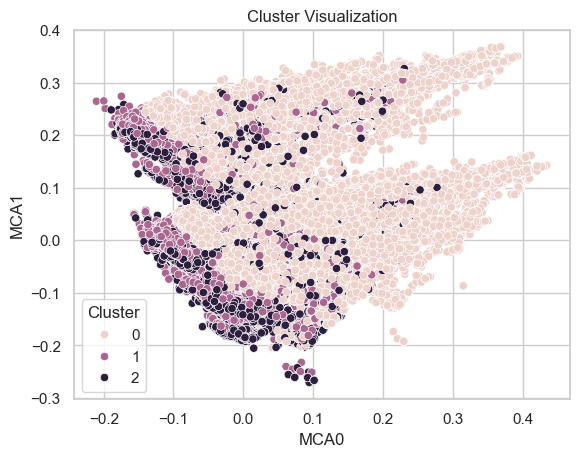

In [ ]:
# Dibujamos los clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.

sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# SIndicamos el grafico
plt.show()

Se crea un gráfico de barras para mostrar la distribución de genero por clusters. 

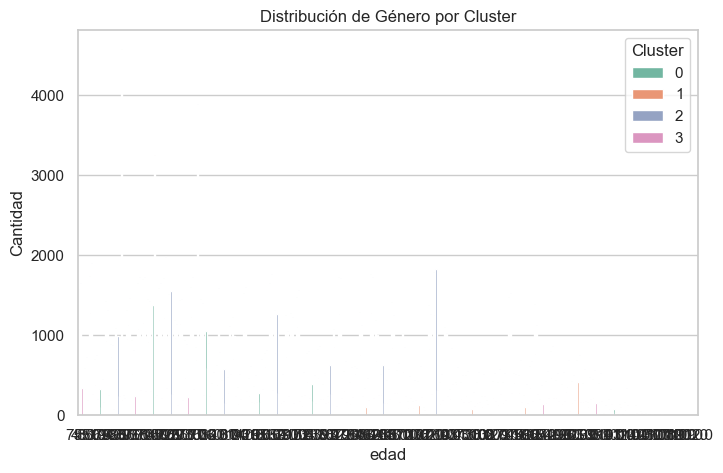

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='edad', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('edad')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

Dado que en el anterior gráfico no se visualizaba correctamente, se realizó el siguiente gráfico separando por grupos de edad. 

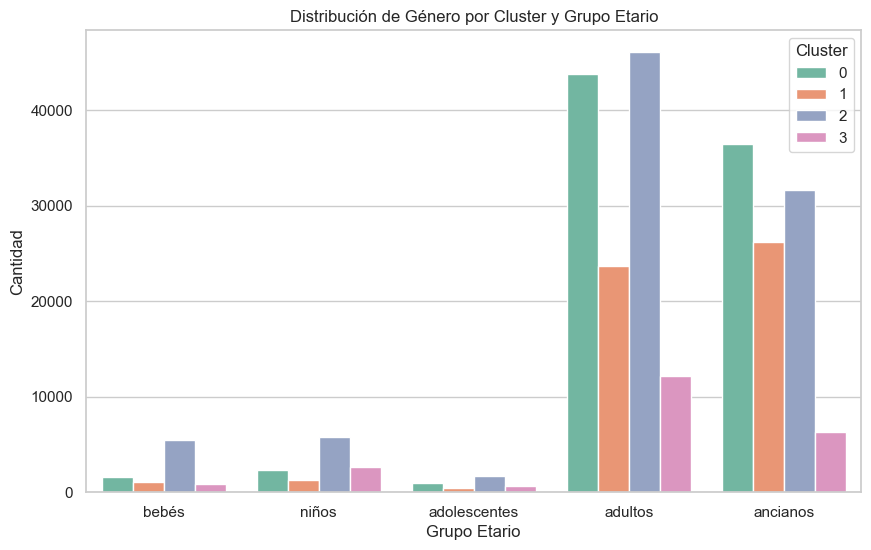

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df_FCluster4 es tu DataFrame y ya está cargado
# Primero, asegurémonos de que la columna 'edad' es de tipo numérico
df_FCluster4['edad'] = pd.to_numeric(df_FCluster4['edad'], errors='coerce')

# Ahora, creemos las categorías de edad
bins = [0, 3, 12, 17, 75, float('inf')]  # Usamos float('inf') para incluir a todos los mayores de 75
labels = ['bebés', 'niños', 'adolescentes', 'adultos', 'ancianos']
df_FCluster4['grupo_etario'] = pd.cut(df_FCluster4['edad'], bins=bins, labels=labels, right=False)

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras para la variable 'grupo_etario'
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='grupo_etario', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadir títulos y etiquetas
plt.title('Distribución de Género por Cluster y Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrar el gráfico
plt.show()


Aqui se reraliza un grafico de barras laterales, para análisar los lugares en donde las personas fallesen por cluster. 

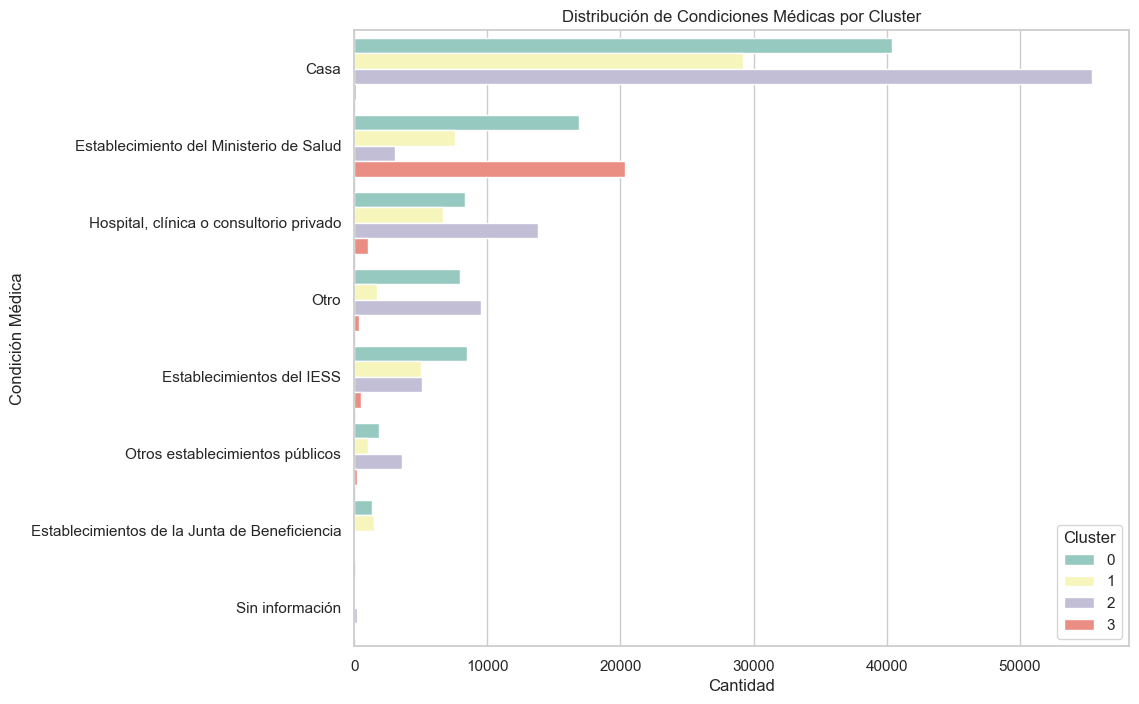

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='lugar_ocur', hue='cluster_labels', data=df_FCluster4, palette='Set3', order=df['lugar_ocur'].value_counts().index)

plt.title('Distribución de Condiciones Médicas por Cluster')
plt.xlabel('Cantidad')
plt.ylabel('Condición Médica')
plt.legend(title='Cluster')

plt.show()

Se crea un gráfico de barras laterales, pero en esta ocasión para ver las condiciones médicas por cluster. 

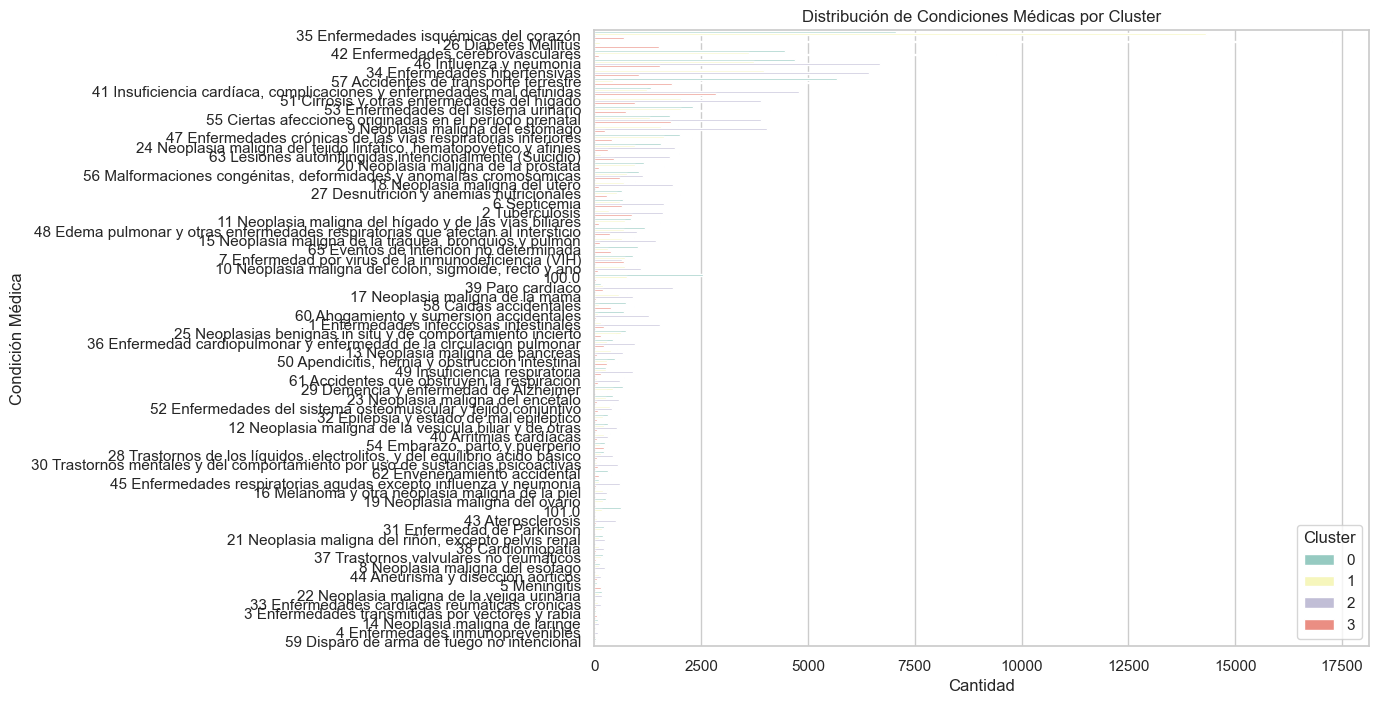

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='lc1', hue='cluster_labels', data=df_FCluster4, palette='Set3', order=df['lc1'].value_counts().index)

plt.title('Distribución de Condiciones Médicas por Cluster')
plt.xlabel('Cantidad')
plt.ylabel('Condición Médica')
plt.legend(title='Cluster')

plt.show()

Se crea un grafico de barras laterales que muestra la distribución de género por cluster.

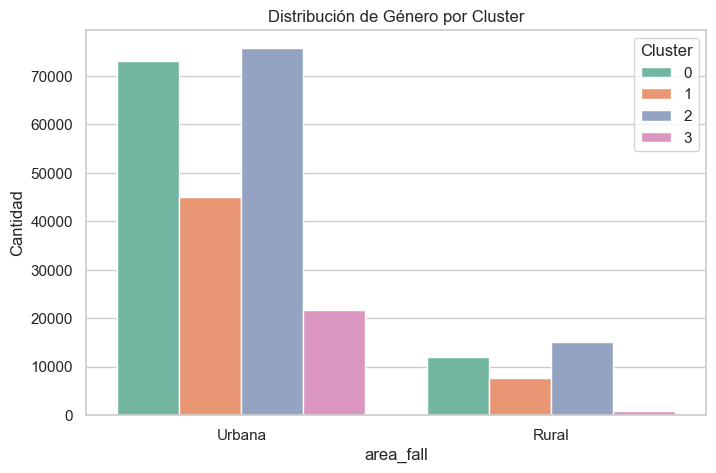

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='area_fall', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('area_fall')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

Se realiza un grafico para mostrar la información de fallecimientos en base al genero, por cluster. 

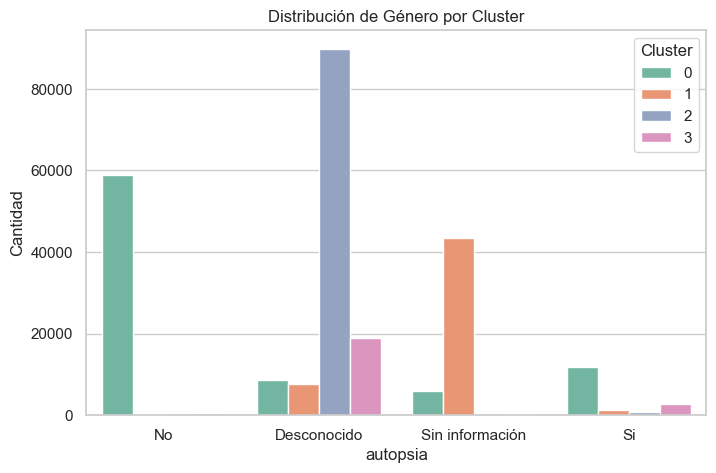

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='autopsia', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('autopsia')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

In [ ]:
mca_coordinates['cluster_labels'] = df_FCluster4['cluster_labels']
mca_coordinates

0         1  cluster_labels
935151  -0.041991 -0.088937               0
175592  -0.041452  0.038248               2
861969  -0.088696 -0.035681               0
811518   0.003720 -0.116591               0
1062163  0.309496  0.039586               0
...           ...       ...             ...
1203391 -0.155694  0.231089               1
164562  -0.038214 -0.006831               2
1082784 -0.056729  0.153255               1
1051014  0.390513  0.128214               0
215231  -0.013714  0.016829               2

[251022 rows x 3 columns]

Se realiza un diagrama de dispersión que muestra la visualización de los clusters utilizando las coordenadas del MCA. 

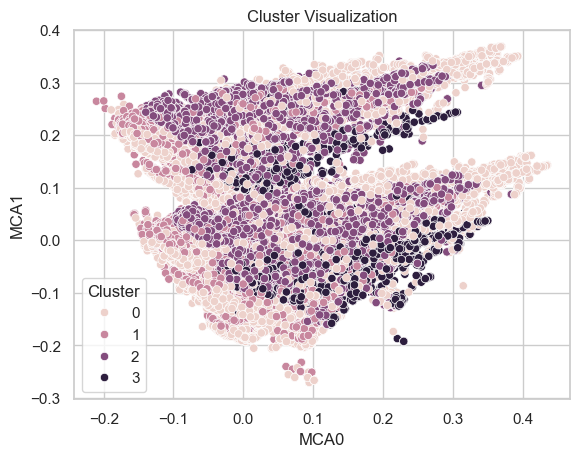

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.

sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

# Modelo Final 2

Se selecciona un subconjunto de columnas del DataFrame df y crea un nuevo DataFrame llamado df_selected que contiene solo las columnas 'edad', 'lc1', 'lugar_ocur', 'area_fall' y 'autopsia'.

In [ ]:
columns_to_keep = ['edad', 'lc1','lugar_ocur', 'area_fall', 'autopsia']
df_selected = df[columns_to_keep]

# Obtener el 20% de los datos aleatorios
df_prueba8 = df_selected.sample(frac=0.2, random_state=40);

Se utiliza el algoritmo KModes del paquete kmodes para determinar el valor óptimo de K (número de clusters) mediante un método basado en el coste de ajuste.

In [ ]:
from kmodes.kmodes import KModes
# Determinamos el valor óptimo de K

cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) # Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_prueba8)
  cost_red.append(kmode_red.cost_)

Convertimos las variables en string. 

In [ ]:
# Convert columns with mixed data types to string
df_prueba8['edad'] = df_prueba8['edad'].astype(str)
df_prueba8['lugar_ocur'] = df_prueba8['lugar_ocur'].astype(str)
df_prueba8['lc1'] = df_prueba8['lc1'].astype(str)
df_prueba8['area_fall'] = df_prueba8['area_fall'].astype(str)
df_prueba8['autopsia'] = df_prueba8['autopsia'].astype(str)


# Fit the KModes model
kmode_red.fit_predict(df_prueba8)

array([1, 0, 1, ..., 2, 4, 0], dtype=uint16)

Realizamos el gráfico de Codo para observar los valores de K

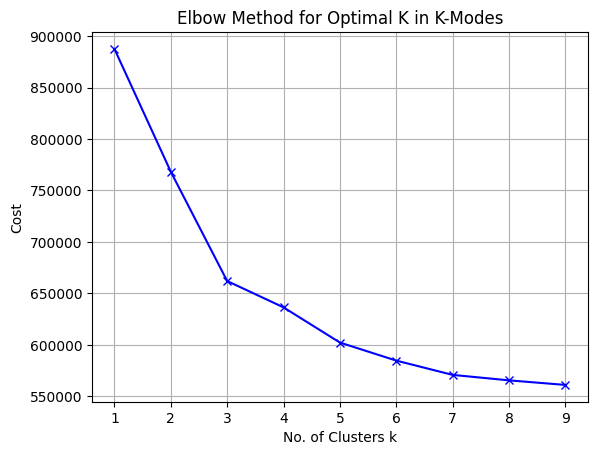

In [ ]:
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

Se aplica KModes para crear 3 clusters en df_prueba8, usando la inicialización 'Huang' y ejecutando el clustering 10 veces para seleccionar la mejor solución. Las etiquetas de cluster resultantes se guardan en clusters_3.

In [ ]:
n_clusters = 3
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_3 = km.fit_predict(df_prueba8)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 33086, cost: 758817.0
Run 1, iteration: 2/100, moves: 13072, cost: 748711.0
Run 1, iteration: 3/100, moves: 135, cost: 748711.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10292, cost: 734647.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 14825, cost: 742409.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 25710, cost: 729268.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 47943, cost: 661975.0
Run 5, iteration: 2/100, moves: 960, cost: 661975.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 1652, cost: 835544.0
Init: initializing centroids
Init: init

array([2, 0, 2, ..., 1, 0, 0], dtype=uint16)

Se copia el DataFrame df_prueba8 a df_FCluster3 y añade una columna con las etiquetas de cluster en la sexta posición, integrando así la información de clusters en el DataFrame original. Las etiquetas de cluster, generadas previamente con KModes, se almacenan en la columna 'cluster_labels' de df_FCluster3.

In [ ]:
df_FCluster3 = df_prueba8.copy()
df_FCluster3.insert(5,"cluster_labels", clusters_3)


Se evalúa la calidad del clustering en df_FCluster3 utilizando el Silhouette Score con distancias de Gower. Primero, toma una muestra aleatoria del 20% de df_FCluster3. Luego, calcula las distancias de Gower para la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio para evaluar cómo de bien están agrupados los puntos dentro de sus clusters con K = 3.

In [ ]:
import gower
from sklearn.metrics import silhouette_score
# Reduce el tamaño del conjunto de datos tomando una muestra aleatoria del 20%
df_sample = df_FCluster3.sample(frac=0.2, random_state=42)

# Calcula las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 3:", silhouette_avg_gower)


Average Categorical Silhouette Score with K = 3: 0.36105746


Se aplica KModes para crear 4 clusters en df_prueba8, usando la inicialización 'Huang' y ejecutando el clustering 10 veces para seleccionar la mejor solución. Las etiquetas de cluster resultantes se guardan en clusters_4.

In [ ]:
n_clusters = 4
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)
clusters_4 = km.fit_predict(df_prueba8)
clusters_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9170, cost: 643277.0
Run 1, iteration: 2/100, moves: 49, cost: 643277.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12697, cost: 735349.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 26992, cost: 719697.0
Run 3, iteration: 2/100, moves: 437, cost: 719697.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11066, cost: 813412.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 104892, cost: 649530.0
Run 5, iteration: 2/100, moves: 7207, cost: 647410.0
Run 5, iteration: 3/100, moves: 4129, cost: 645396.0
Run 5, iteration: 4/100, moves: 829, cost: 645396.0
Init: initializing centroids
Init: initializing clusters
Starting ite

array([1, 3, 1, ..., 2, 0, 3], dtype=uint16)

Se copia el DataFrame df_prueba8 a df_FCluster4 y añade una columna con las etiquetas de cluster en la sexta posición, integrando así la información de clusters en el DataFrame original. Las etiquetas de cluster, generadas previamente con KModes, se almacenan en la columna 'cluster_labels' de df_FCluster4.

In [ ]:
df_FCluster4 = df_prueba8.copy()
df_FCluster4.insert(5,"cluster_labels", clusters_4)

Se evalúa la calidad del clustering en df_FCluster4 utilizando el Silhouette Score con distancias de Gower. Primero, toma una muestra aleatoria del 20% de df_FCluster4. Luego, calcula las distancias de Gower para la muestra, excluyendo la columna de etiquetas de cluster. Finalmente, calcula y muestra el Silhouette Score promedio para evaluar cómo de bien están agrupados los puntos dentro de sus clusters con K = 4.

In [ ]:
import gower
from sklearn.metrics import silhouette_score
# Reducir el tamaño del conjunto de datos tomando una muestra aleatoria del 20%
df_sample = df_FCluster4.sample(frac=0.2, random_state=42)

# Calcular las distancias de Gower utilizando el conjunto de datos muestreado
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score with K = 4:", silhouette_avg_gower)

Average Categorical Silhouette Score with K = 4: 0.28444108


In [ ]:
df_categorical2 = pd.get_dummies(df_prueba8)
df_categorical2

edad_0.0  edad_1.0  edad_10.0  edad_100.0  edad_101.0  edad_102.0  \
935151      False     False      False       False       False       False   
175592      False     False      False       False       False       False   
861969      False     False      False       False       False       False   
811518      False     False      False       False       False       False   
1062163     False     False      False       False       False       False   
...           ...       ...        ...         ...         ...         ...   
1203391     False     False      False       False       False       False   
164562      False     False      False       False       False       False   
1082784     False     False      False       False       False       False   
1051014     False     False      False       False       False       False   
215231      False      True      False       False       False       False   

         edad_103.0  edad_104.0  edad_105.0  edad_106.0  ...  area_fall_Rural  \
935151        False       False       False       False  ...            False   
175592        False       False       False       False  ...            False   
861969        False       False       False       False  ...            False   
811518        False       False       False       False  ...            False   
1062163       False       False       False       False  ...            False   
...             ...         ...         ...         ...  ...              ...   
1203391       False       False       False       False  ...             True   
164562        False       False       False       False  ...            False   
1082784       False       False       False       False  ...             True   
1051014       False       False       False       False  ...            False   
215231        False       False       False       False  ...            False   

         area_fall_Urbana  autopsia_Desconocido  autopsia_No  autopsia_Si  \
935151               True                 False         True        False   
175592               True                  True        False        False   
861969               True                 False         True        False   
811518               True                 False        False        False   
1062163              True                 False        False         True   
...                   ...                   ...          ...          ...   
1203391             False                 False        False        False   
164562               True                  True        False        False   
1082784             False                 False        False        False   
1051014              True                 False        False         True   
215231               True                  True        False        False   

         autopsia_Sin información  area_fautopsiaall_Desconocido  \
935151                      False                          False   
175592                      False                           True   
861969                      False                          False   
811518                       True                          False   
1062163                     False                          False   
...                           ...                            ...   
1203391                      True                          False   
164562                      False                           True   
1082784                      True                          False   
1051014                     False                          False   
215231                      False                           True   

         area_fautopsiaall_No  area_fautopsiaall_Si  \
935151                   True                 False   
175592                  False                 False   
861969                   True                 False   
811518                  False                 False   
1062163                 False                  True   
...                       .

In [ ]:
# Indicamos el número de componentes que requerimos
import prince
mca = prince.MCA(n_components=2)
# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categorical2)
mca
# Transforme el conjunto de datos (esto le dará las coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categorical2)
mca_coordinates

0         1
935151   0.154422 -0.006921
175592  -0.114845 -0.087995
861969   0.174752 -0.011005
811518   0.137431  0.019505
1062163 -0.076420  0.440527
...           ...       ...
1203391  0.094856 -0.032562
164562  -0.095488 -0.087722
1082784  0.090236  0.010934
1051014 -0.128632  0.509523
215231  -0.158166 -0.110548

[251022 rows x 2 columns]

In [ ]:
mca_coordinates['cluster_labels'] = df_FCluster3['cluster_labels']
mca_coordinates

0         1  cluster_labels
935151   0.154422 -0.006921               2
175592  -0.114845 -0.087995               0
861969   0.174752 -0.011005               2
811518   0.137431  0.019505               1
1062163 -0.076420  0.440527               0
...           ...       ...             ...
1203391  0.094856 -0.032562               1
164562  -0.095488 -0.087722               0
1082784  0.090236  0.010934               1
1051014 -0.128632  0.509523               0
215231  -0.158166 -0.110548               0

[251022 rows x 3 columns]

Se realiza el gráfico de dispersión para observar los clusters

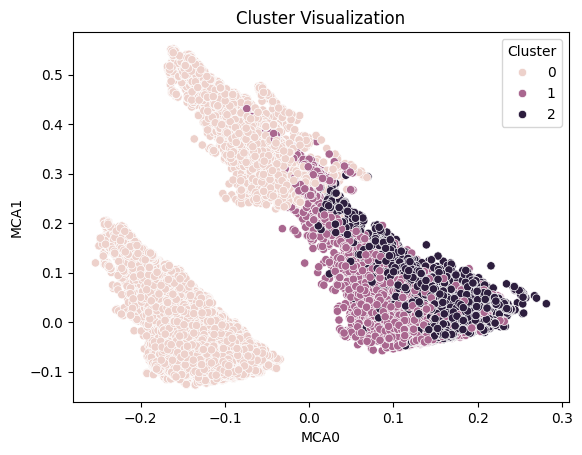

In [ ]:
# Dibujamos los clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.

sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

Se realiza este gráfico para observar las edades de fallecidos por cluster. 

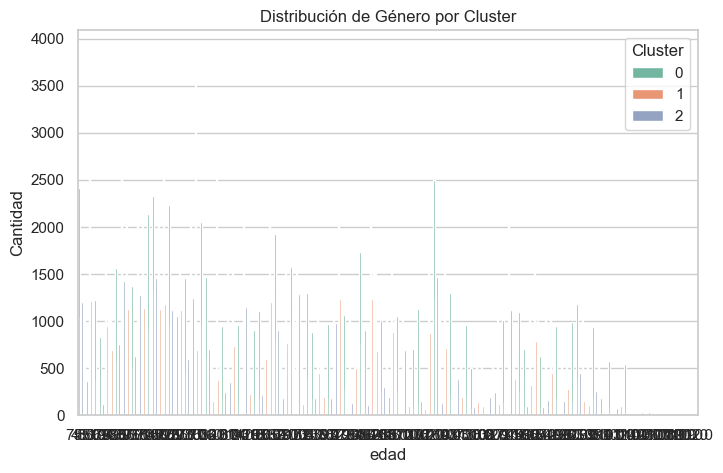

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='edad', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('edad')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

En este gráfico se mejora la visualización de los datos calsificados por rango de edad. 

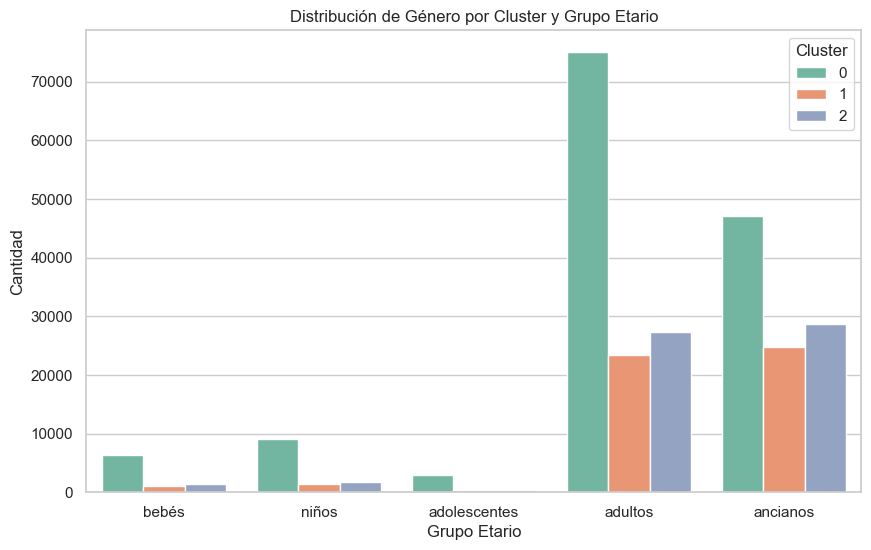

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Primero, asegurémonos de que la columna 'edad' es de tipo numérico
df_FCluster4['edad'] = pd.to_numeric(df_FCluster4['edad'], errors='coerce')

# Ahora, creemos las categorías de edad
bins = [0, 3, 12, 17, 75, float('inf')]  # Usamos float('inf') para incluir a todos los mayores de 75
labels = ['bebés', 'niños', 'adolescentes', 'adultos', 'ancianos']
df_FCluster4['grupo_etario'] = pd.cut(df_FCluster4['edad'], bins=bins, labels=labels, right=False)

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras para la variable 'grupo_etario'
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='grupo_etario', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadir títulos y etiquetas
plt.title('Distribución de Género por Cluster y Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrar el gráfico
plt.show()


Aqui realizamos este grafico para observar el rango de fallecimientos en residencias, o establecimientos medicos. 

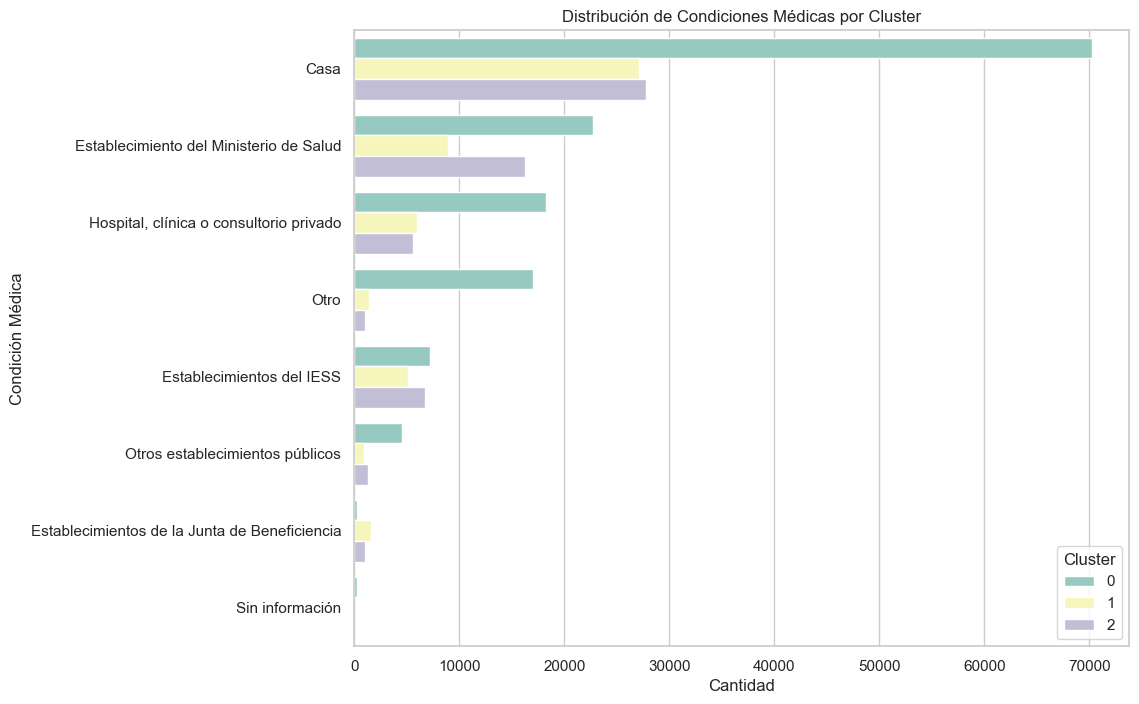

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='lugar_ocur', hue='cluster_labels', data=df_FCluster4, palette='Set3', order=df['lugar_ocur'].value_counts().index)

plt.title('Distribución de Condiciones Médicas por Cluster')
plt.xlabel('Cantidad')
plt.ylabel('Condición Médica')
plt.legend(title='Cluster')

plt.show()

En este gráfico clasificamos por enfermedades. 

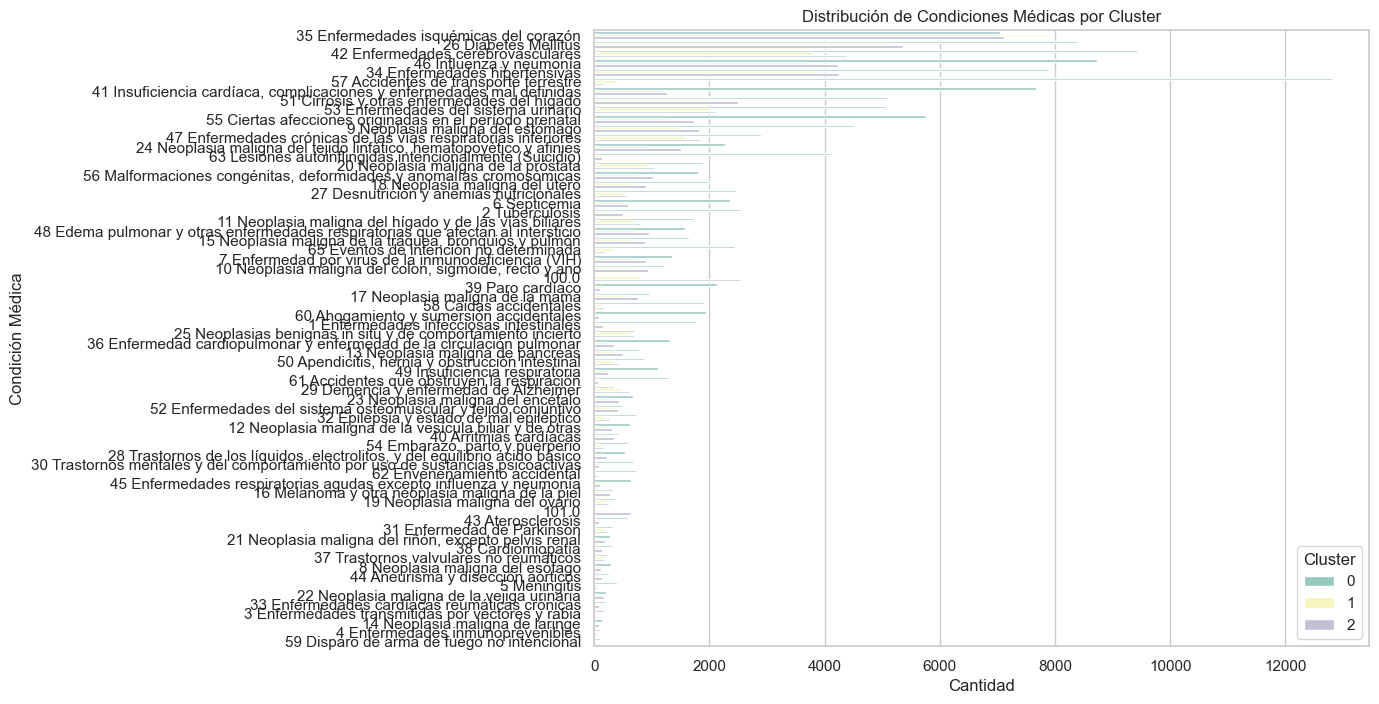

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='lc1', hue='cluster_labels', data=df_FCluster4, palette='Set3', order=df['lc1'].value_counts().index)

plt.title('Distribución de Condiciones Médicas por Cluster')
plt.xlabel('Cantidad')
plt.ylabel('Condición Médica')
plt.legend(title='Cluster')

plt.show()

En este grafico se clasifica por area Rural o Urbana

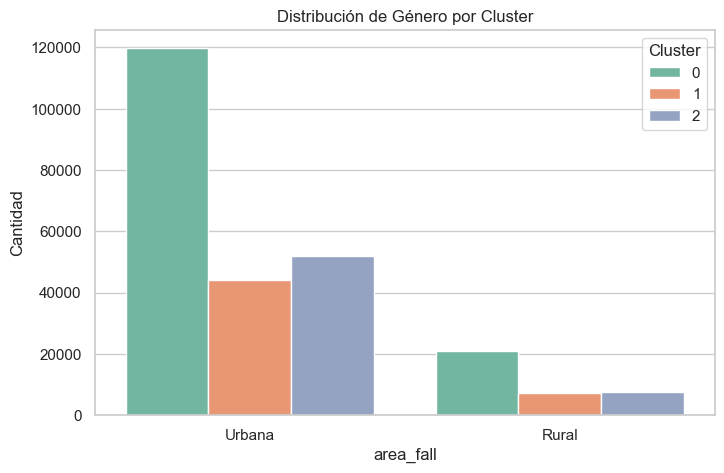

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='area_fall', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('area_fall')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

En este gráfico de barras, se clasifica las autopsias que tienen o no tienen información. 

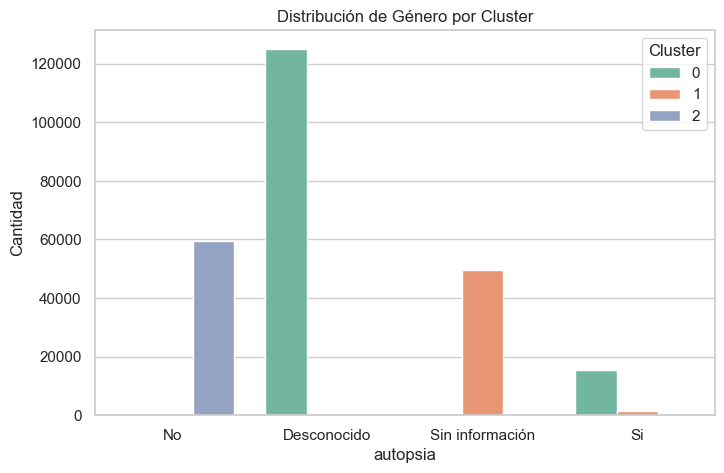

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo del gráfico
sns.set(style="whitegrid")

# Creando el gráfico de barras para la variable 'sexo'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='autopsia', hue='cluster_labels', data=df_FCluster4, palette='Set2')

# Añadiendo títulos y etiquetas
plt.title('Distribución de Género por Cluster')
plt.xlabel('autopsia')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')

# Mostrando el gráfico
plt.show()

In [ ]:
mca_coordinates['cluster_labels'] = df_FCluster4['cluster_labels']
mca_coordinates

0         1  cluster_labels
935151   0.154422 -0.006921               1
175592  -0.114845 -0.087995               3
861969   0.174752 -0.011005               1
811518   0.137431  0.019505               2
1062163 -0.076420  0.440527               0
...           ...       ...             ...
1203391  0.094856 -0.032562               2
164562  -0.095488 -0.087722               3
1082784  0.090236  0.010934               2
1051014 -0.128632  0.509523               0
215231  -0.158166 -0.110548               3

[251022 rows x 3 columns]

Realizamos otro gráfico para observar la distribución de los clusters. 

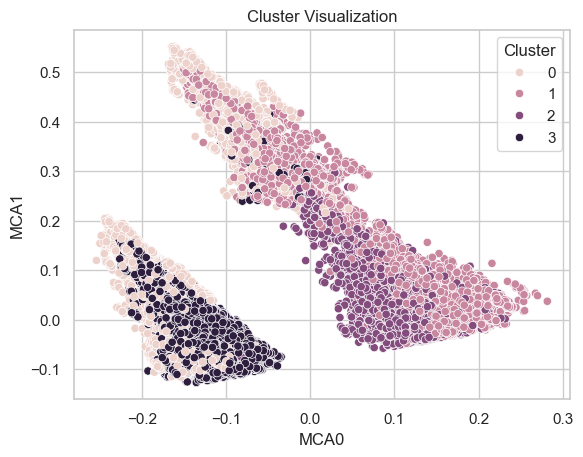

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.

sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()